In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import missingno as msno
from plotly.offline import init_notebook_mode, iplot
import statistics
import scipy.stats as stats
import plotly.graph_objs as go

# Importing Data

In [2]:
bankData = pd.read_csv("Assignment3-Marketing-Dataset.csv")

In [3]:
pd.concat([bankData.head(),bankData.tail()])

row ID  age          job  marital            education  default  \
0          Row0   56    housemaid  married             basic.4y       no   
1          Row1   56     services  married          high.school       no   
2          Row2   45     services  married             basic.9y  unknown   
3          Row3   59       admin.  married  professional.course       no   
4          Row4   41  blue-collar  married              unknown  unknown   
26355  Row26355   29   unemployed   single             basic.4y       no   
26356  Row26356   46  blue-collar  married  professional.course       no   
26357  Row26357   56      retired  married    university.degree       no   
26358  Row26358   44   technician  married  professional.course       no   
26359  Row26359   74      retired  married  professional.course       no   

      housing loan    contact month  ... campaign  pdays  previous  \
0          no   no  telephone   may  ...        1    999         0   
1          no  yes  telephone   may  ...        1    999         0   
2          no   no  telephone   may  ...        1    999         0   
3          no   no  telephone   may  ...        1    999         0   
4          no   no  telephone   may  ...        1    999         0   
26355     yes   no   cellular   nov  ...        1      9         1   
26356      no   no   cellular   nov  ...        1    999         0   
26357     yes   no   cellular   nov  ...        2    999         0   
26358      no   no   cellular   nov  ...        1    999         0   
26359     yes   no   cellular   nov  ...        3    999         1   

          poutcome  emp.var.rate cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent           1.1         93.994          -36.4      4.857   
1      nonexistent           1.1         93.994          -36.4      4.857   
2      nonexistent           1.1         93.994          -36.4      4.857   
3      nonexistent           1.1         93.994          -36.4      4.857   
4      nonexistent           1.1         93.994          -36.4      4.857   
26355      success          -1.1         94.767          -50.8      1.028   
26356  nonexistent          -1.1         94.767          -50.8      1.028   
26357  nonexistent          -1.1         94.767          -50.8      1.028   
26358  nonexistent          -1.1         94.767          -50.8      1.028   
26359      failure          -1.1         94.767          -50.8      1.028   

       nr.employed  subscribed  
0           5191.0           0  
1           5191.0           0  
2           5191.0           0  
3           5191.0           0  
4           5191.0           0  
26355       4963.6           0  
26356       4963.6           0  
26357       4963.6           0  
26358       4963.6           1  
26359       4963.6           0  

[10 rows x 22 columns]

In [4]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26360 entries, 0 to 26359
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row ID          26360 non-null  object 
 1   age             26360 non-null  int64  
 2   job             26360 non-null  object 
 3   marital         26360 non-null  object 
 4   education       26360 non-null  object 
 5   default         26360 non-null  object 
 6   housing         26360 non-null  object 
 7   loan            26360 non-null  object 
 8   contact         26360 non-null  object 
 9   month           26360 non-null  object 
 10  day_of_week     26360 non-null  object 
 11  duration        26360 non-null  int64  
 12  campaign        26360 non-null  int64  
 13  pdays           26360 non-null  int64  
 14  previous        26360 non-null  int64  
 15  poutcome        26360 non-null  object 
 16  emp.var.rate    26360 non-null  float64
 17  cons.price.idx  26360 non-null 

# Dealing Missing Value

In [5]:
bankData.replace(['unknown'], pd.NA, inplace=True)

In [6]:
bankData.isnull().sum()

row ID               0
age                  0
job                212
marital             51
education         1080
default           5551
housing            647
loan               647
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
subscribed           0
dtype: int64

In [7]:
bankData.isnull().mean() * 100

row ID             0.000000
age                0.000000
job                0.804249
marital            0.193475
education          4.097117
default           21.058422
housing            2.454476
loan               2.454476
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
subscribed         0.000000
dtype: float64

In [8]:
# dropping 'default' attribute as it has 20% of missing values
bankData.drop(['default'],axis=1, inplace=True)
missing_categorical = ['job','marital','education','housing','loan']

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= pd.NA , strategy='most_frequent')
bankData[missing_categorical] = imputer.fit_transform(bankData[missing_categorical])
bankData

row ID  age          job  marital            education housing loan  \
0          Row0   56    housemaid  married             basic.4y      no   no   
1          Row1   56     services  married          high.school      no  yes   
2          Row2   45     services  married             basic.9y      no   no   
3          Row3   59       admin.  married  professional.course      no   no   
4          Row4   41  blue-collar  married    university.degree      no   no   
...         ...  ...          ...      ...                  ...     ...  ...   
26355  Row26355   29   unemployed   single             basic.4y     yes   no   
26356  Row26356   46  blue-collar  married  professional.course      no   no   
26357  Row26357   56      retired  married    university.degree     yes   no   
26358  Row26358   44   technician  married  professional.course      no   no   
26359  Row26359   74      retired  married  professional.course     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
26355   cellular   nov         fri  ...         1      9         1   
26356   cellular   nov         fri  ...         1    999         0   
26357   cellular   nov         fri  ...         2    999         0   
26358   cellular   nov         fri  ...         1    999         0   
26359   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
26355      success         -1.1          94.767          -50.8      1.028   
26356  nonexistent         -1.1          94.767          -50.8      1.028   
26357  nonexistent         -1.1          94.767          -50.8      1.028   
26358  nonexistent         -1.1          94.767          -50.8      1.028   
26359      failure         -1.1          94.767          -50.8      1.028   

       nr.employed  subscribed  
0           5191.0           0  
1           5191.0           0  
2           5191.0           0  
3           5191.0           0  
4           5191.0           0  
...            ...         ...  
26355       4963.6           0  
26356       4963.6           0  
26357       4963.6           0  
26358       4963.6           1  
26359       4963.6           0  

[26360 rows x 21 columns]

<AxesSubplot:>

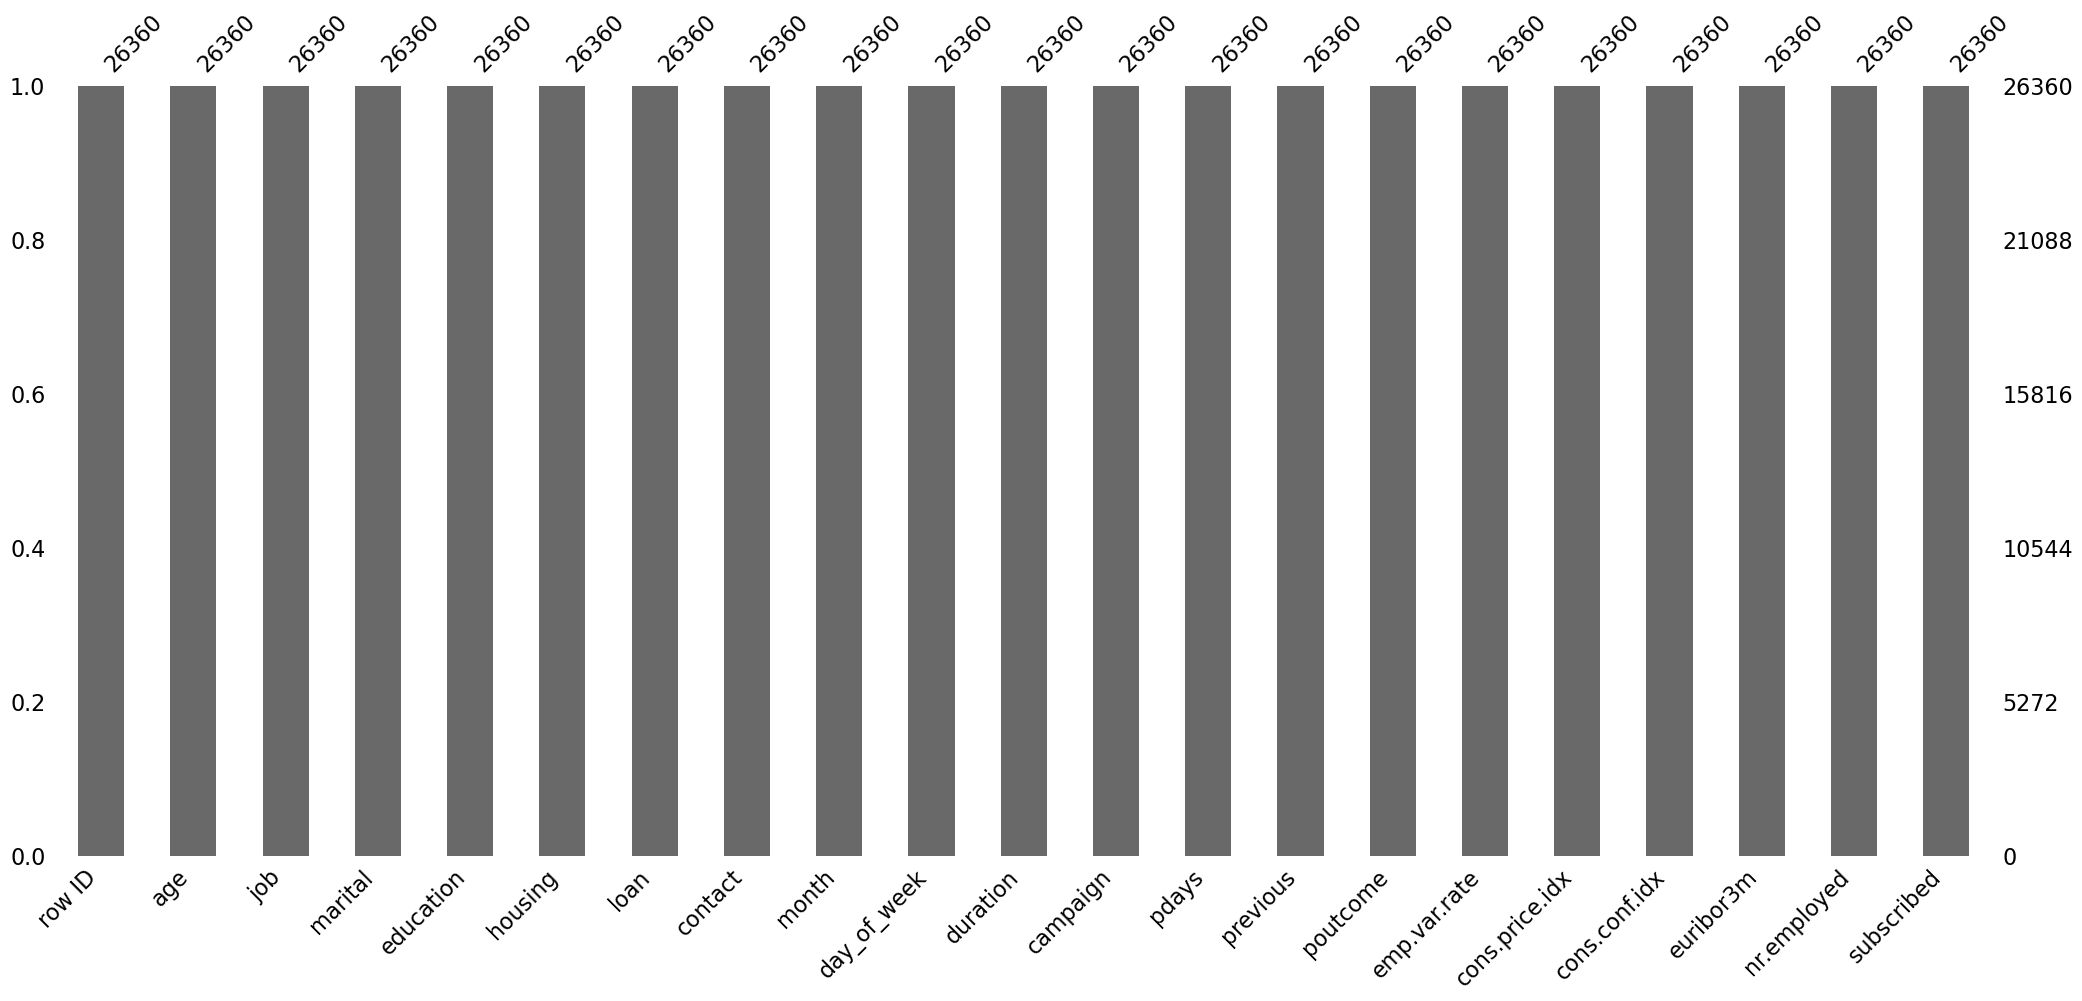

In [10]:
msno.bar(bankData)

In [11]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26360 entries, 0 to 26359
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row ID          26360 non-null  object 
 1   age             26360 non-null  int64  
 2   job             26360 non-null  object 
 3   marital         26360 non-null  object 
 4   education       26360 non-null  object 
 5   housing         26360 non-null  object 
 6   loan            26360 non-null  object 
 7   contact         26360 non-null  object 
 8   month           26360 non-null  object 
 9   day_of_week     26360 non-null  object 
 10  duration        26360 non-null  int64  
 11  campaign        26360 non-null  int64  
 12  pdays           26360 non-null  int64  
 13  previous        26360 non-null  int64  
 14  poutcome        26360 non-null  object 
 15  emp.var.rate    26360 non-null  float64
 16  cons.price.idx  26360 non-null  float64
 17  cons.conf.idx   26360 non-null 

## Data Exploration

In [12]:
bankData.describe()

age      duration      campaign         pdays      previous  \
count  26360.000000  26360.000000  26360.000000  26360.000000  26360.000000   
mean      40.055994    258.799317      2.556639    961.516161      0.173065   
std       10.452764    263.562218      2.715861    189.261156      0.490529   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    179.000000      2.000000    999.000000      0.000000   
75%       47.000000    320.000000      3.000000    999.000000      0.000000   
max       98.000000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  26360.000000    26360.000000   26360.000000  26360.000000   
mean       0.074848       93.570798     -40.490303      3.618071   
std        1.576832        0.578183       4.635120      1.735283   
min       -3.400000       92.201000     -50.800000      0.634000   
25%       -1.800000       93.075000     -42.700000      1.344000   
50%        1.100000       93.444000     -41.800000      4.857000   
75%        1.400000       93.994000     -36.400000      4.961000   
max        1.400000       94.767000     -26.900000      5.045000   

        nr.employed    subscribed  
count  26360.000000  26360.000000  
mean    5167.032845      0.112443  
std       72.089807      0.315917  
min     4963.600000      0.000000  
25%     5099.100000      0.000000  
50%     5191.000000      0.000000  
75%     5228.100000      0.000000  
max     5228.100000      1.000000

In [13]:
categorical_attribute = ['job','marital','education','housing','loan','contact','month','day_of_week','poutcome','subscribed']
numerical_attribute = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx'
                       ,'euribor3m','nr.employed']

In [14]:
for i in bankData[numerical_attribute] :
    print(bankData[i].value_counts(),'\n')

31    1258
32    1197
33    1179
36    1143
34    1112
      ... 
89       2
95       1
87       1
91       1
94       1
Name: age, Length: 78, dtype: int64 

136     122
72      114
85      114
96      113
90      112
       ... 
1056      1
1389      1
1019      1
1806      1
1868      1
Name: duration, Length: 1413, dtype: int64 

1     11243
2      6837
3      3416
4      1691
5      1014
6       627
7       384
8       272
9       189
10      157
11      112
12       74
13       66
15       38
14       35
17       33
16       30
18       19
20       19
21       12
23       11
19       11
22       11
27        8
24        8
29        7
26        6
28        5
31        4
30        4
25        3
35        3
33        3
32        2
40        2
34        2
42        1
56        1
Name: campaign, dtype: int64 

999    25365
3        296
6        267
4         80
2         43
9         41
7         39
12        37
10        33
5         26
13        25
11        18
15        18
1       

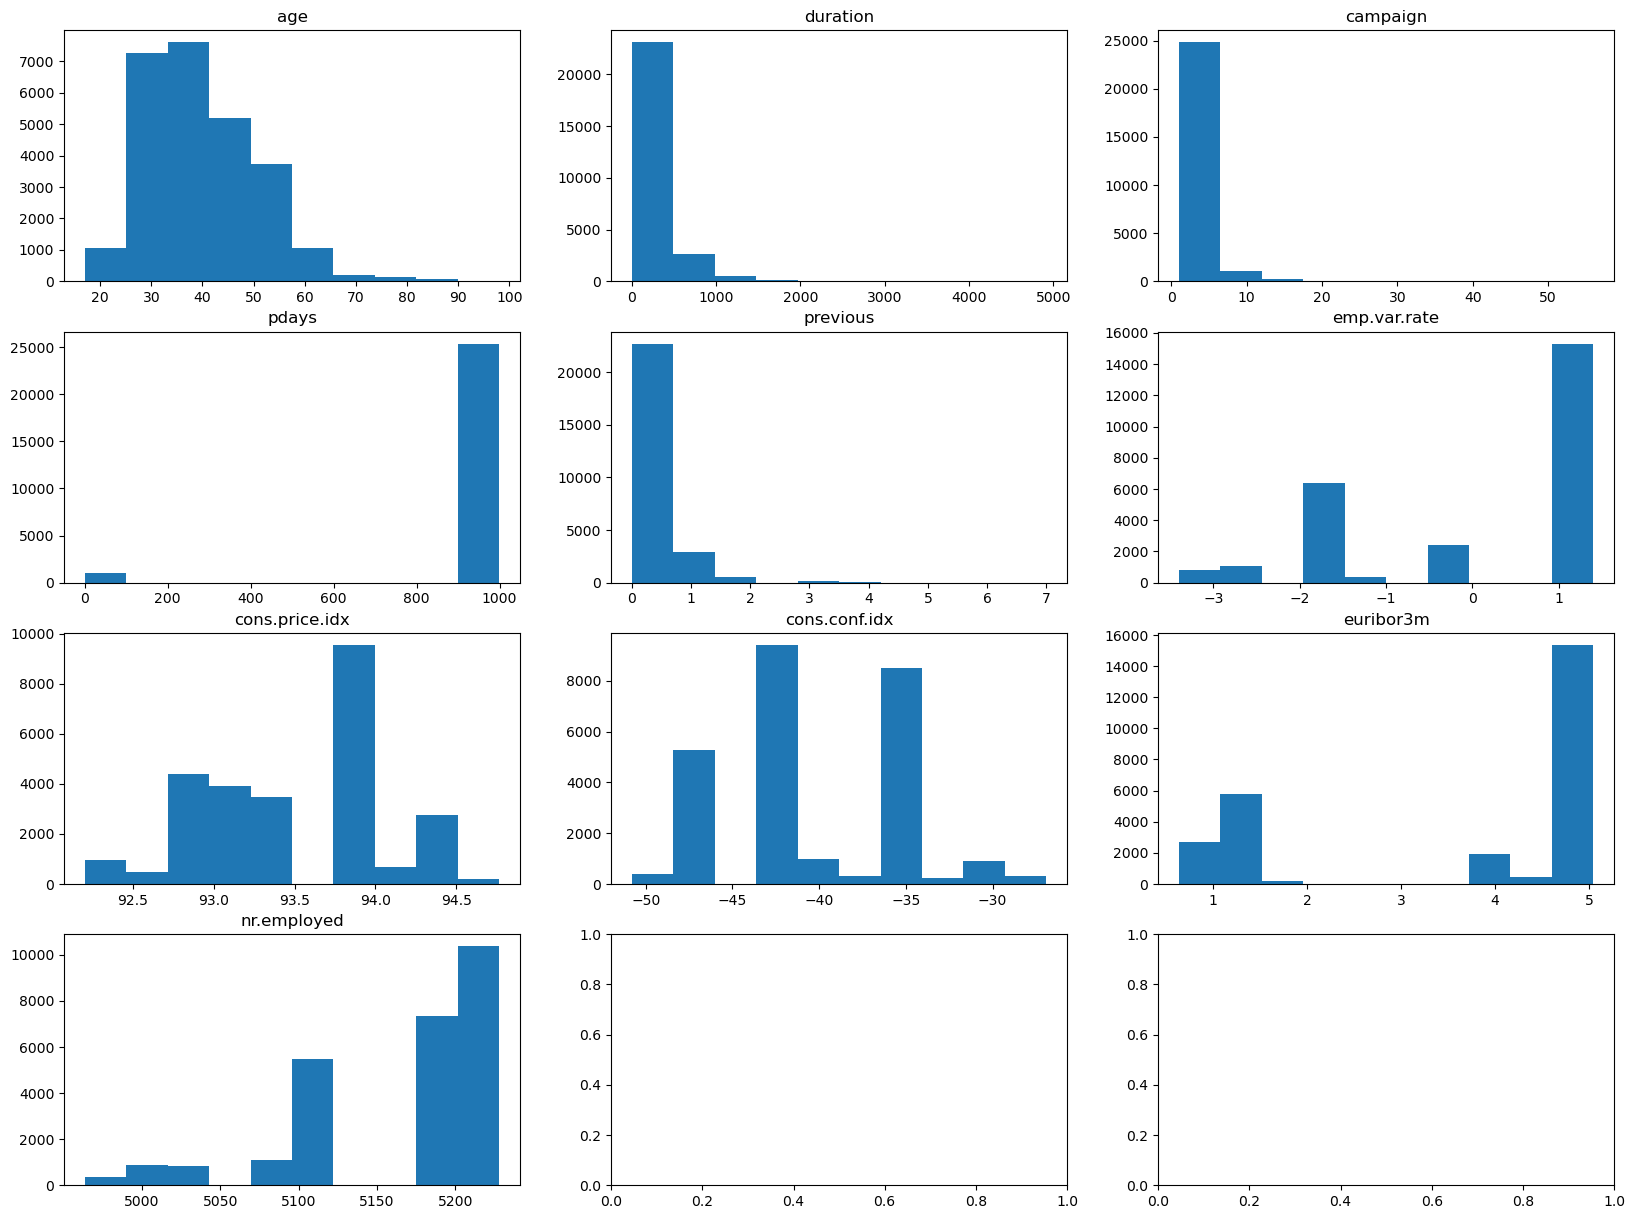

In [15]:
fig, axs = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in numerical_attribute:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(bankData[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

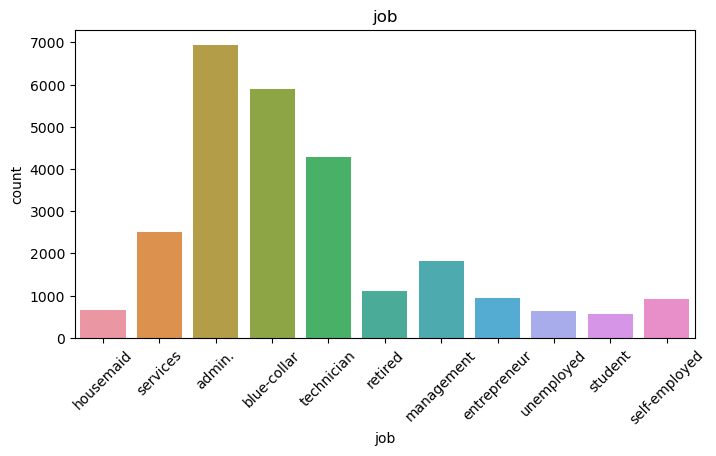

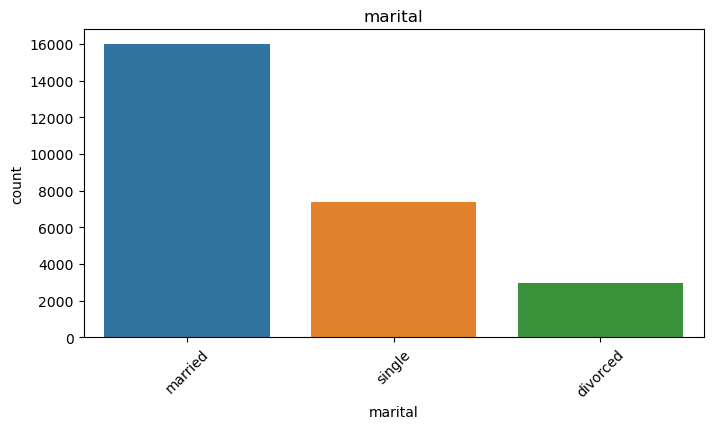

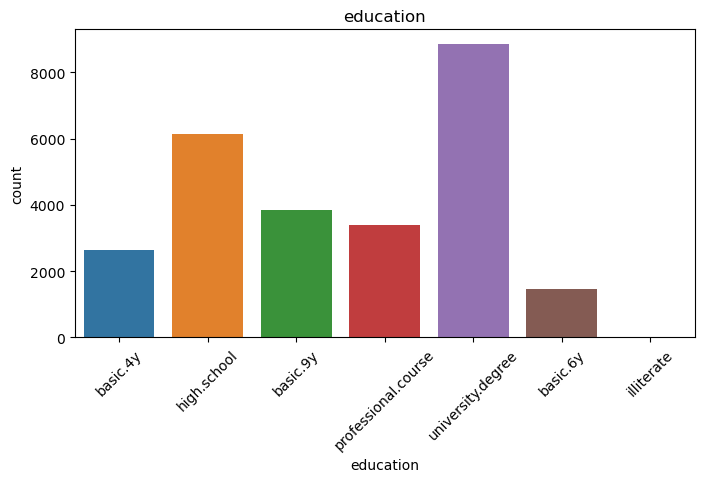

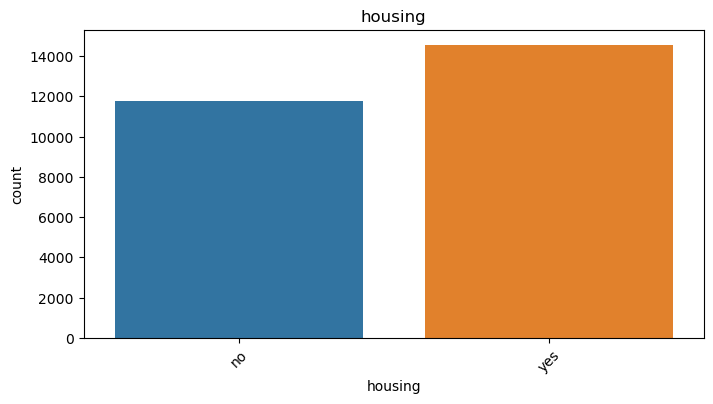

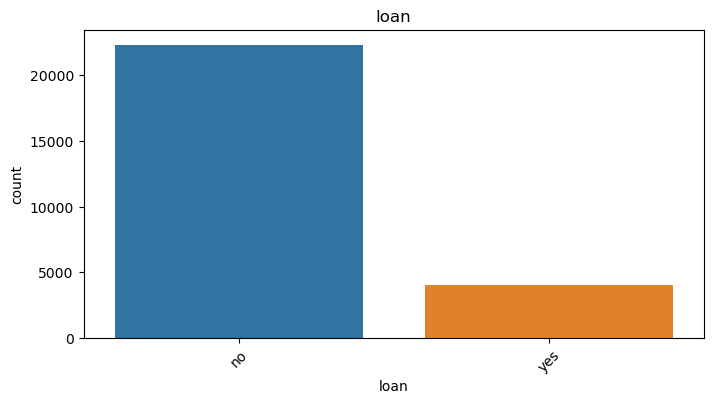

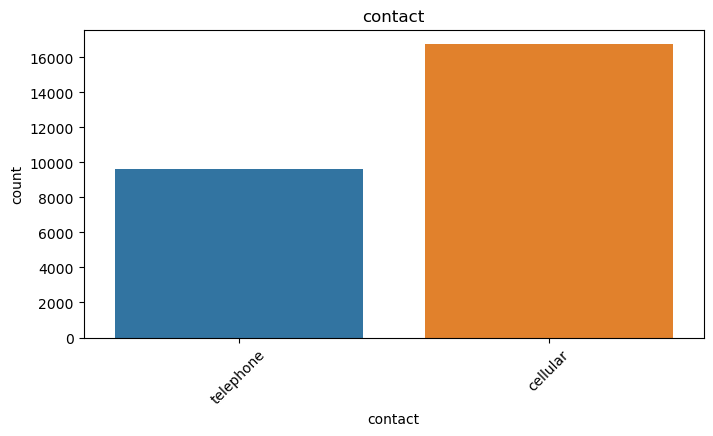

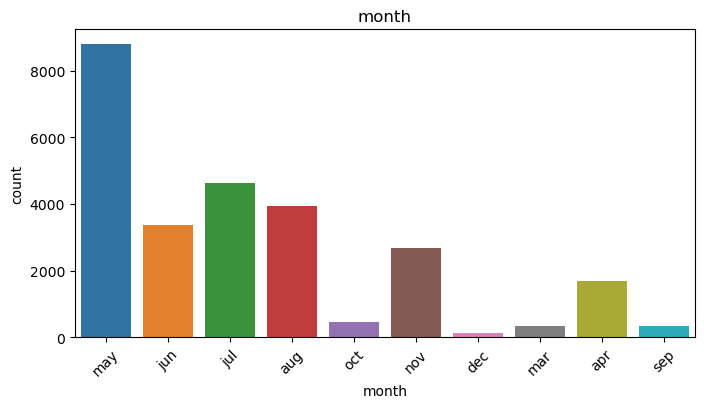

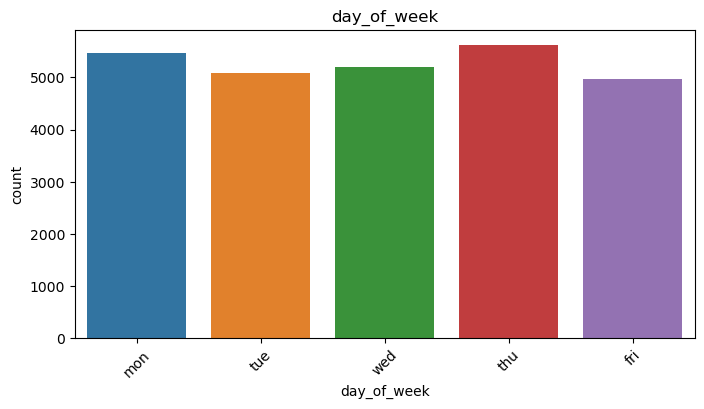

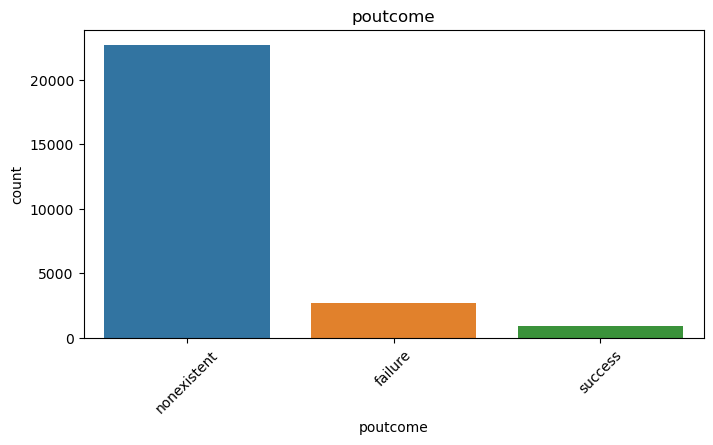

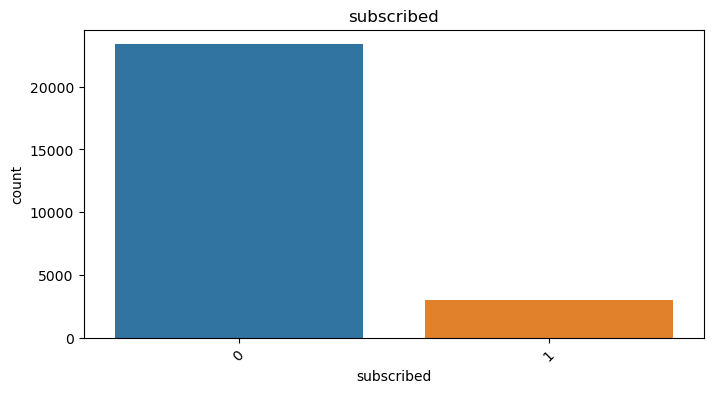

In [16]:
for col in categorical_attribute:
    plt.figure(figsize=(8,4))
    sns.countplot(x=bankData[col], data=bankData)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

In [17]:
for i in bankData[categorical_attribute] :
    print(bankData[i].value_counts(),'\n')

admin.           6951
blue-collar      5898
technician       4293
services         2519
management       1821
retired          1116
entrepreneur      945
self-employed     928
housemaid         668
unemployed        646
student           575
Name: job, dtype: int64 

married     15988
single       7399
divorced     2973
Name: marital, dtype: int64 

university.degree      8856
high.school            6143
basic.9y               3857
professional.course    3385
basic.4y               2633
basic.6y               1472
illiterate               14
Name: education, dtype: int64 

yes    14577
no     11783
Name: housing, dtype: int64 

no     22343
yes     4017
Name: loan, dtype: int64 

cellular     16750
telephone     9610
Name: contact, dtype: int64 

may    8797
jul    4631
aug    3930
jun    3381
nov    2668
apr    1676
oct     454
sep     353
mar     335
dec     135
Name: month, dtype: int64 

thu    5631
mon    5466
wed    5197
tue    5091
fri    4975
Name: day_of_week, dtype: int64 

n

0    23396
1     2964
Name: subscribed, dtype: int64


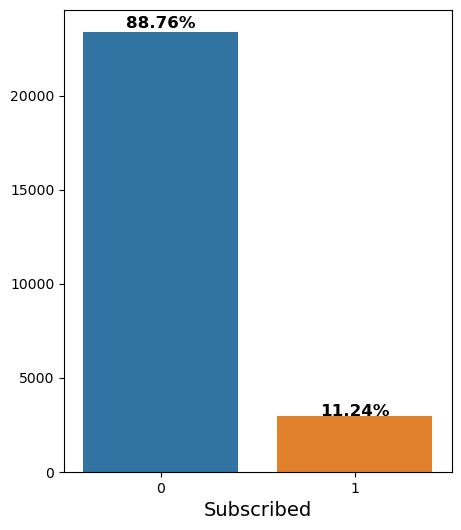

In [18]:
print(bankData["subscribed"].value_counts())
plt.figure(figsize=(5,6))
ax = sns.countplot(data = bankData, x = bankData.subscribed)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{round(height * 100 / bankData.shape[0], 2)}%', (x + width/2, y + height * 1.01), ha='center', weight = 'bold', fontsize = 12)
plt.xlabel(r'Subscribed', fontsize = 14)
plt.ylabel(r'')
plt.show()

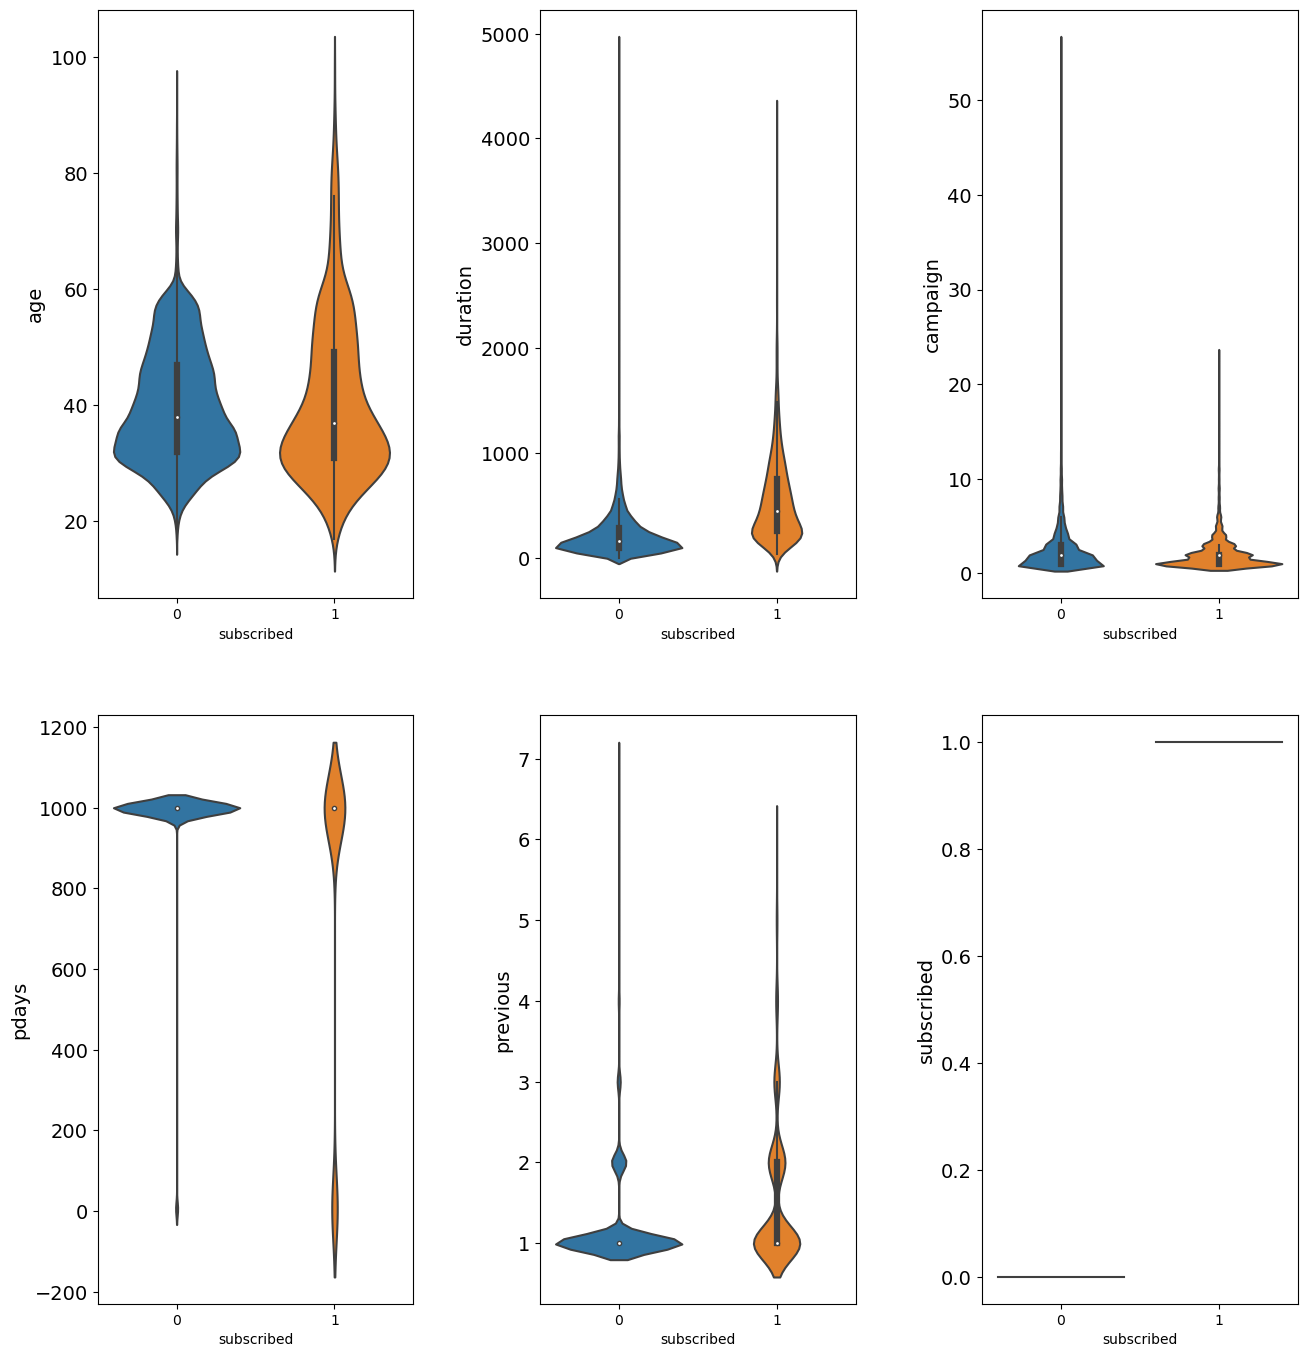

In [19]:
df_num = bankData.select_dtypes('int').columns
plt.figure(figsize = (15, 25))
for idx, col in enumerate(df_num):
    plt.subplot(3, 3, idx + 1)
    if col == 'pdays':
        ax = sns.violinplot(data = bankData, y = bankData[bankData[col] > -1][col], x = bankData.subscribed, inner = 'box')
    elif col == 'previous':
        ax = sns.violinplot(data = bankData, y = bankData[bankData[col] > 0][col], x = bankData.subscribed, inner = 'box')
    else:
        ax = sns.violinplot(data = bankData, y = bankData[col], x = bankData.subscribed)
    #plt.axhline(df[col].mean(), color='red', linewidth=3)
    #plt.axhline(df[col].median(), color='green', linewidth=3)
    plt.ylabel(col, fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.2)

In [20]:
c_df = pd.DataFrame()
c_df['age_yes'] = (bankData[bankData['subscribed'] == 1][['subscribed','age']].describe())['age']
c_df['age_no'] = (bankData[bankData['subscribed'] == 0][['subscribed','age']].describe())['age']

c_df

age_yes        age_no
count  2964.000000  23396.000000
mean     40.789811     39.963028
std      13.751986      9.953598
min      17.000000     17.000000
25%      31.000000     32.000000
50%      37.000000     38.000000
75%      49.250000     47.000000
max      98.000000     95.000000

In [21]:
pivotTable = pd.pivot_table(bankData, values='subscribed', index='job',
                    columns='education',aggfunc= 'sum')
pivotTable

education      basic.4y  basic.6y  basic.9y  high.school  illiterate  \
job                                                                    
admin.              9.0       6.0      28.0        254.0         0.0   
blue-collar        78.0      65.0     148.0         58.0         0.0   
entrepreneur        5.0       7.0       7.0         11.0         1.0   
housemaid          28.0       4.0       2.0          9.0         0.0   
management          3.0       5.0       8.0         12.0         NaN   
retired           112.0       6.0       9.0         40.0         2.0   
self-employed       2.0       1.0      13.0          5.0         1.0   
services            5.0      14.0      15.0        134.0         NaN   
student             3.0       6.0      17.0         80.0         NaN   
technician          4.0       3.0      30.0         56.0         NaN   
unemployed         12.0       3.0      15.0         24.0         NaN   

education      professional.course  university.degree  
job                                                    
admin.                        34.0              562.0  
blue-collar                   29.0               24.0  
entrepreneur                   5.0               44.0  
housemaid                      6.0               13.0  
management                     5.0              174.0  
retired                       36.0               58.0  
self-employed                 13.0               64.0  
services                      11.0               33.0  
student                       13.0               62.0  
technician                   218.0              157.0  
unemployed                    13.0               30.0

# Data preprocessing

In [22]:
bankData = bankData.drop('row ID', axis=1)
bankData

age          job  marital            education housing loan    contact  \
0       56    housemaid  married             basic.4y      no   no  telephone   
1       56     services  married          high.school      no  yes  telephone   
2       45     services  married             basic.9y      no   no  telephone   
3       59       admin.  married  professional.course      no   no  telephone   
4       41  blue-collar  married    university.degree      no   no  telephone   
...    ...          ...      ...                  ...     ...  ...        ...   
26355   29   unemployed   single             basic.4y     yes   no   cellular   
26356   46  blue-collar  married  professional.course      no   no   cellular   
26357   56      retired  married    university.degree     yes   no   cellular   
26358   44   technician  married  professional.course      no   no   cellular   
26359   74      retired  married  professional.course     yes   no   cellular   

      month day_of_week  duration  campaign  pdays  previous     poutcome  \
0       may         mon       261         1    999         0  nonexistent   
1       may         mon       307         1    999         0  nonexistent   
2       may         mon       198         1    999         0  nonexistent   
3       may         mon       139         1    999         0  nonexistent   
4       may         mon       217         1    999         0  nonexistent   
...     ...         ...       ...       ...    ...       ...          ...   
26355   nov         fri       112         1      9         1      success   
26356   nov         fri       383         1    999         0  nonexistent   
26357   nov         fri       189         2    999         0  nonexistent   
26358   nov         fri       442         1    999         0  nonexistent   
26359   nov         fri       239         3    999         1      failure   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0               1.1          93.994          -36.4      4.857       5191.0   
1               1.1          93.994          -36.4      4.857       5191.0   
2               1.1          93.994          -36.4      4.857       5191.0   
3               1.1          93.994          -36.4      4.857       5191.0   
4               1.1          93.994          -36.4      4.857       5191.0   
...             ...             ...            ...        ...          ...   
26355          -1.1          94.767          -50.8      1.028       4963.6   
26356          -1.1          94.767          -50.8      1.028       4963.6   
26357          -1.1          94.767          -50.8      1.028       4963.6   
26358          -1.1          94.767          -50.8      1.028       4963.6   
26359          -1.1          94.767          -50.8      1.028       4963.6   

       subscribed  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
26355           0  
26356           0  
26357           0  
26358           1  
26359           0  

[26360 rows x 20 columns]

In [23]:
bankData

age          job  marital            education housing loan    contact  \
0       56    housemaid  married             basic.4y      no   no  telephone   
1       56     services  married          high.school      no  yes  telephone   
2       45     services  married             basic.9y      no   no  telephone   
3       59       admin.  married  professional.course      no   no  telephone   
4       41  blue-collar  married    university.degree      no   no  telephone   
...    ...          ...      ...                  ...     ...  ...        ...   
26355   29   unemployed   single             basic.4y     yes   no   cellular   
26356   46  blue-collar  married  professional.course      no   no   cellular   
26357   56      retired  married    university.degree     yes   no   cellular   
26358   44   technician  married  professional.course      no   no   cellular   
26359   74      retired  married  professional.course     yes   no   cellular   

      month day_of_week  duration  campaign  pdays  previous     poutcome  \
0       may         mon       261         1    999         0  nonexistent   
1       may         mon       307         1    999         0  nonexistent   
2       may         mon       198         1    999         0  nonexistent   
3       may         mon       139         1    999         0  nonexistent   
4       may         mon       217         1    999         0  nonexistent   
...     ...         ...       ...       ...    ...       ...          ...   
26355   nov         fri       112         1      9         1      success   
26356   nov         fri       383         1    999         0  nonexistent   
26357   nov         fri       189         2    999         0  nonexistent   
26358   nov         fri       442         1    999         0  nonexistent   
26359   nov         fri       239         3    999         1      failure   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0               1.1          93.994          -36.4      4.857       5191.0   
1               1.1          93.994          -36.4      4.857       5191.0   
2               1.1          93.994          -36.4      4.857       5191.0   
3               1.1          93.994          -36.4      4.857       5191.0   
4               1.1          93.994          -36.4      4.857       5191.0   
...             ...             ...            ...        ...          ...   
26355          -1.1          94.767          -50.8      1.028       4963.6   
26356          -1.1          94.767          -50.8      1.028       4963.6   
26357          -1.1          94.767          -50.8      1.028       4963.6   
26358          -1.1          94.767          -50.8      1.028       4963.6   
26359          -1.1          94.767          -50.8      1.028       4963.6   

       subscribed  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
26355           0  
26356           0  
26357           0  
26358           1  
26359           0  

[26360 rows x 20 columns]

In [24]:
scale_mapper = {"illiterate":0, "basic.4y":1, "basic.6y":2 ,"basic.9y":3,
               "high.school":4,"professional.course":5,"university.degree":6}
bankData["education"] = bankData["education"].replace(scale_mapper)


#label encode works well for df not numpy
# for this one le isnt use bcs we can make our own order

In [25]:
X = bankData.iloc[:, :-1]
y = bankData.iloc[:,-1]

In [26]:
X

age          job  marital  education housing loan    contact month  \
0       56    housemaid  married          1      no   no  telephone   may   
1       56     services  married          4      no  yes  telephone   may   
2       45     services  married          3      no   no  telephone   may   
3       59       admin.  married          5      no   no  telephone   may   
4       41  blue-collar  married          6      no   no  telephone   may   
...    ...          ...      ...        ...     ...  ...        ...   ...   
26355   29   unemployed   single          1     yes   no   cellular   nov   
26356   46  blue-collar  married          5      no   no   cellular   nov   
26357   56      retired  married          6     yes   no   cellular   nov   
26358   44   technician  married          5      no   no   cellular   nov   
26359   74      retired  married          5     yes   no   cellular   nov   

      day_of_week  duration  campaign  pdays  previous     poutcome  \
0             mon       261         1    999         0  nonexistent   
1             mon       307         1    999         0  nonexistent   
2             mon       198         1    999         0  nonexistent   
3             mon       139         1    999         0  nonexistent   
4             mon       217         1    999         0  nonexistent   
...           ...       ...       ...    ...       ...          ...   
26355         fri       112         1      9         1      success   
26356         fri       383         1    999         0  nonexistent   
26357         fri       189         2    999         0  nonexistent   
26358         fri       442         1    999         0  nonexistent   
26359         fri       239         3    999         1      failure   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0               1.1          93.994          -36.4      4.857       5191.0  
1               1.1          93.994          -36.4      4.857       5191.0  
2               1.1          93.994          -36.4      4.857       5191.0  
3               1.1          93.994          -36.4      4.857       5191.0  
4               1.1          93.994          -36.4      4.857       5191.0  
...             ...             ...            ...        ...          ...  
26355          -1.1          94.767          -50.8      1.028       4963.6  
26356          -1.1          94.767          -50.8      1.028       4963.6  
26357          -1.1          94.767          -50.8      1.028       4963.6  
26358          -1.1          94.767          -50.8      1.028       4963.6  
26359          -1.1          94.767          -50.8      1.028       4963.6  

[26360 rows x 19 columns]

In [27]:
# Convert nominal categorical value
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,4,5,6,7,8,13])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [28]:
X[0]

array([ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,
        0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  1.0000e+00,  0.0000e+00,  5.6000e+01,  1.0000e+00,
        2.6100e+02,  1.0000e+00,  9.9900e+02,  0.0000e+00,  1.1000e+00,
        9.3994e+01, -3.6400e+01,  4.8570e+00,  5.1910e+03])

# Building Models

In [29]:
bank_corr = bankData.corr()

<AxesSubplot:>

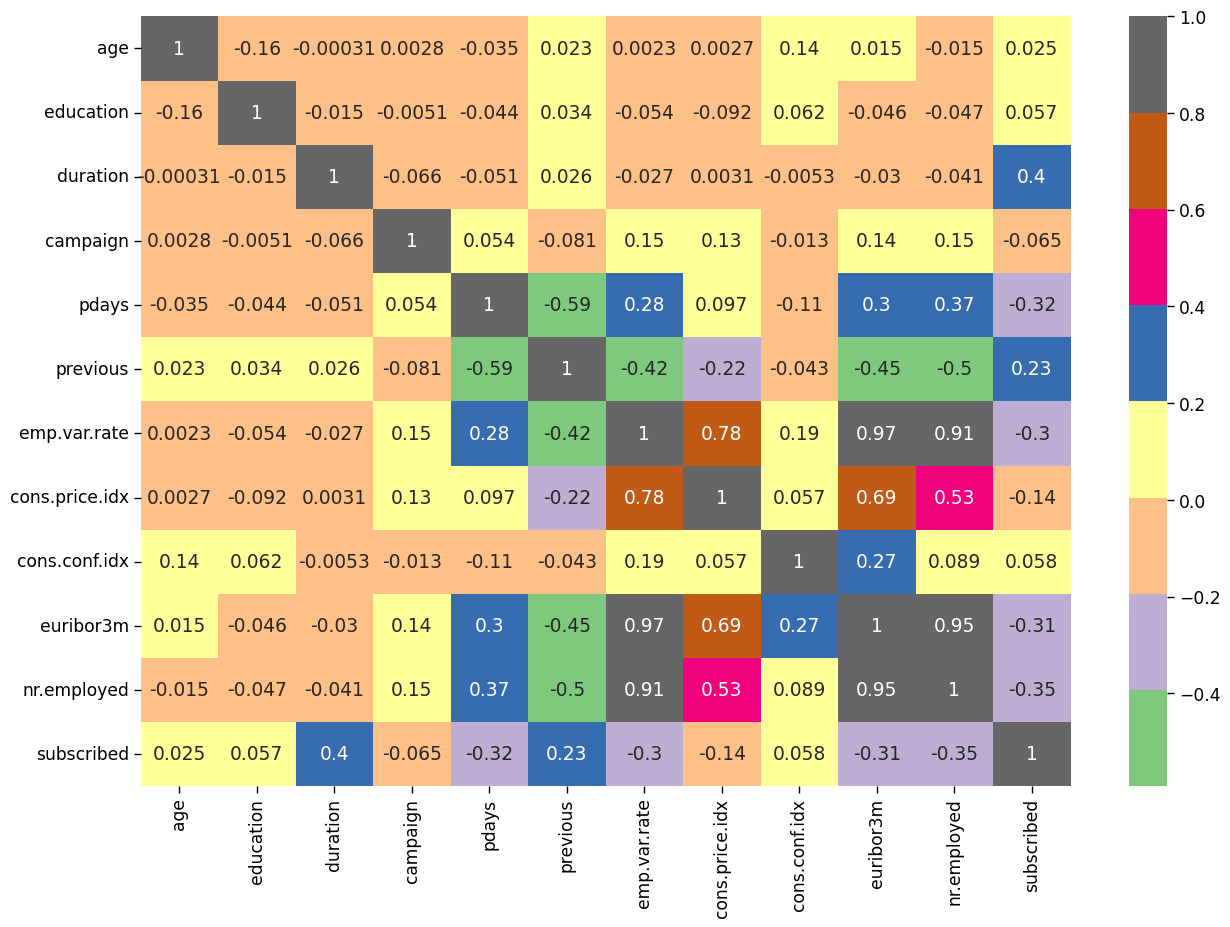

In [30]:
plt.figure(figsize=(15,10))
sns.set_context('paper', font_scale=1.4)
sns.heatmap(bank_corr, annot=True, cmap='Accent')

In [31]:
bank_corr['subscribed'].sort_values(ascending=True)

nr.employed      -0.351258
pdays            -0.320820
euribor3m        -0.306341
emp.var.rate     -0.300278
cons.price.idx   -0.143725
campaign         -0.065436
age               0.024988
education         0.057166
cons.conf.idx     0.057937
previous          0.229887
duration          0.399974
subscribed        1.000000
Name: subscribed, dtype: float64

In [32]:
bankData = pd.get_dummies(bankData, columns = ['job','marital','housing','loan','contact','month','day_of_week','poutcome'])

In [33]:
bank_corr = bankData.corr()

In [34]:
bank_corr['subscribed'].sort_values(ascending=True)

nr.employed            -0.351258
pdays                  -0.320820
euribor3m              -0.306341
emp.var.rate           -0.300278
poutcome_nonexistent   -0.193821
cons.price.idx         -0.143725
contact_telephone      -0.142108
month_may              -0.107764
job_blue-collar        -0.075260
campaign               -0.065436
marital_married        -0.043691
month_jul              -0.033678
job_services           -0.029101
day_of_week_mon        -0.024767
job_entrepreneur       -0.016961
month_aug              -0.016487
marital_divorced       -0.016435
job_housemaid          -0.010019
month_nov              -0.008758
day_of_week_fri        -0.006262
housing_no             -0.006018
job_technician         -0.004787
job_self-employed      -0.003484
month_jun              -0.003293
loan_yes               -0.002567
day_of_week_wed         0.000191
job_management          0.001061
loan_no                 0.002567
housing_yes             0.006018
day_of_week_tue         0.011728
job_unempl

## Neural Network

In [35]:
from sklearn.model_selection import train_test_split
seed_num = 0 # random_state is set to a value for reproducible output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=seed_num) # 70 30 udh perfect tp tar di report coba cobain bnyk percentage

print(X_train.shape)
print(X_test.shape)

(18452, 49)
(7908, 49)


In [36]:
X_train[0]

array([ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,
        0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  1.0000e+00,  0.0000e+00,  5.7000e+01,  6.0000e+00,
        1.1200e+02,  1.0000e+00,  9.9900e+02,  0.0000e+00, -2.9000e+00,
        9.2963e+01, -4.0800e+01,  1.2600e+00,  5.0762e+03])

In [37]:
from sklearn.neural_network import MLPClassifier

clf_nn = MLPClassifier(hidden_layer_sizes=(4), early_stopping=True,
                    validation_fraction=0.2,
                    verbose=True)

clf_nn.fit(X_train, y_train)

Iteration 1, loss = 31.99756564
Validation score: 0.112165
Iteration 2, loss = 31.99756512
Validation score: 0.112165
Iteration 3, loss = 31.99756486
Validation score: 0.112165
Iteration 4, loss = 16.76854958
Validation score: 0.901382
Iteration 5, loss = 0.98867667
Validation score: 0.899214
Iteration 6, loss = 0.97232252
Validation score: 0.898943
Iteration 7, loss = 0.96007966
Validation score: 0.898402
Iteration 8, loss = 0.94847127
Validation score: 0.898131
Iteration 9, loss = 0.93954305
Validation score: 0.897589
Iteration 10, loss = 0.93013326
Validation score: 0.897589
Iteration 11, loss = 0.92301949
Validation score: 0.897589
Iteration 12, loss = 0.91675597
Validation score: 0.897589
Iteration 13, loss = 0.91062827
Validation score: 0.897589
Iteration 14, loss = 0.90391227
Validation score: 0.897589
Iteration 15, loss = 0.85253154
Validation score: 0.897589
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(early_stopping=True, hidden_layer_sizes=4,
              validation_fraction=0.2, verbose=True)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
y_pred = clf_nn.predict(X_test)
print ("Accuracy : " )
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 
0.900227617602428
[[6871  144]
 [ 645  248]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7015
           1       0.63      0.28      0.39       893

    accuracy                           0.90      7908
   macro avg       0.77      0.63      0.67      7908
weighted avg       0.88      0.90      0.88      7908



# Parameter Tuning

In [39]:
from sklearn.model_selection import GridSearchCV

layers = [[20], [40,20] ,[45,40,15]] # we try using 1 2 3 hidden layer. kl 1 hidden layer itu yg 20 doang.
#'batch_size' : [128,256],
param_grid = [
  {'hidden_layer_sizes' : layers,
   'activation': ['logistic', 'tanh', 'relu'],
   'verbose' : [True],
   'random_state' : [0],
   'early_stopping' : [True],
   'validation_fraction' : [0.3]
  }
]
NN = MLPClassifier() # default weight = uniform
clf_nn = GridSearchCV(NN, param_grid, cv=5, scoring='accuracy', return_train_score=False) # if scoring = 'f1', it would count the f1 score
clf_nn.fit(X_train, y_train);

Iteration 1, loss = 0.43595765
Validation score: 0.887785
Iteration 2, loss = 0.38015444
Validation score: 0.887785
Iteration 3, loss = 0.35904139
Validation score: 0.887785
Iteration 4, loss = 0.34685718
Validation score: 0.887785
Iteration 5, loss = 0.33450581
Validation score: 0.887785
Iteration 6, loss = 0.33100726
Validation score: 0.887785
Iteration 7, loss = 0.32342363
Validation score: 0.887785
Iteration 8, loss = 0.31234917
Validation score: 0.887785
Iteration 9, loss = 0.31001342
Validation score: 0.887785
Iteration 10, loss = 0.30340186
Validation score: 0.887785
Iteration 11, loss = 0.29905361
Validation score: 0.887785
Iteration 12, loss = 0.29745544
Validation score: 0.887785
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.43594831
Validation score: 0.887785
Iteration 2, loss = 0.38014197
Validation score: 0.887785
Iteration 3, loss = 0.35899967
Validation score: 0.887785
Iteration 4, loss = 0.35066884
Val

Iteration 13, loss = 0.26262635
Validation score: 0.898848
Iteration 14, loss = 0.26063486
Validation score: 0.892527
Iteration 15, loss = 0.26969540
Validation score: 0.890494
Iteration 16, loss = 0.26296260
Validation score: 0.893881
Iteration 17, loss = 0.26081532
Validation score: 0.899977
Iteration 18, loss = 0.25959050
Validation score: 0.894784
Iteration 19, loss = 0.25887394
Validation score: 0.896365
Iteration 20, loss = 0.25954506
Validation score: 0.899752
Iteration 21, loss = 0.25937247
Validation score: 0.893204
Iteration 22, loss = 0.25911535
Validation score: 0.899300
Iteration 23, loss = 0.25739652
Validation score: 0.900881
Iteration 24, loss = 0.25683342
Validation score: 0.893204
Iteration 25, loss = 0.25308704
Validation score: 0.903138
Iteration 26, loss = 0.25405011
Validation score: 0.905170
Iteration 27, loss = 0.25027508
Validation score: 0.899526
Iteration 28, loss = 0.25147662
Validation score: 0.899074
Iteration 29, loss = 0.25013053
Validation score: 0.9072

Iteration 2, loss = 0.40787124
Validation score: 0.887785
Iteration 3, loss = 0.36918704
Validation score: 0.887785
Iteration 4, loss = 0.35579253
Validation score: 0.887785
Iteration 5, loss = 0.34984773
Validation score: 0.887785
Iteration 6, loss = 0.34404493
Validation score: 0.887785
Iteration 7, loss = 0.33087673
Validation score: 0.887785
Iteration 8, loss = 0.31259916
Validation score: 0.887785
Iteration 9, loss = 0.29619664
Validation score: 0.887785
Iteration 10, loss = 0.28418785
Validation score: 0.887785
Iteration 11, loss = 0.27767843
Validation score: 0.887785
Iteration 12, loss = 0.27124329
Validation score: 0.887785
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.58953578
Validation score: 0.887785
Iteration 2, loss = 0.40836146
Validation score: 0.887785
Iteration 3, loss = 0.36942004
Validation score: 0.887785
Iteration 4, loss = 0.35568503
Validation score: 0.887785
Iteration 5, loss = 0.34959775
Val

Iteration 23, loss = 0.25321341
Validation score: 0.886205
Iteration 24, loss = 0.25485003
Validation score: 0.899526
Iteration 25, loss = 0.26017884
Validation score: 0.897945
Iteration 26, loss = 0.26230327
Validation score: 0.897494
Iteration 27, loss = 0.25895987
Validation score: 0.898848
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.34372329
Validation score: 0.887785
Iteration 2, loss = 0.30986865
Validation score: 0.887785
Iteration 3, loss = 0.28657759
Validation score: 0.886430
Iteration 4, loss = 0.27750030
Validation score: 0.897042
Iteration 5, loss = 0.27283829
Validation score: 0.890946
Iteration 6, loss = 0.26616337
Validation score: 0.898397
Iteration 7, loss = 0.26104236
Validation score: 0.899752
Iteration 8, loss = 0.26917773
Validation score: 0.903816
Iteration 9, loss = 0.27074361
Validation score: 0.896591
Iteration 10, loss = 0.26642814
Validation score: 0.891623
Iteration 11, loss = 0.26411531

Iteration 23, loss = 0.26162966
Validation score: 0.897720
Iteration 24, loss = 0.26203831
Validation score: 0.895462
Iteration 25, loss = 0.26578496
Validation score: 0.897720
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.40121758
Validation score: 0.887785
Iteration 2, loss = 0.32648777
Validation score: 0.887785
Iteration 3, loss = 0.30230725
Validation score: 0.887785
Iteration 4, loss = 0.29532395
Validation score: 0.887785
Iteration 5, loss = 0.28240067
Validation score: 0.888237
Iteration 6, loss = 0.26795401
Validation score: 0.890043
Iteration 7, loss = 0.27492348
Validation score: 0.897494
Iteration 8, loss = 0.26694466
Validation score: 0.897042
Iteration 9, loss = 0.26200119
Validation score: 0.898171
Iteration 10, loss = 0.26655907
Validation score: 0.895913
Iteration 11, loss = 0.26326944
Validation score: 0.896591
Iteration 12, loss = 0.26094791
Validation score: 0.895913
Iteration 13, loss = 0.26125036

Iteration 21, loss = 0.27394617
Validation score: 0.902235
Iteration 22, loss = 0.24716146
Validation score: 0.909912
Iteration 23, loss = 0.24239587
Validation score: 0.904042
Iteration 24, loss = 0.34715319
Validation score: 0.842628
Iteration 25, loss = 0.26542525
Validation score: 0.896591
Iteration 26, loss = 0.42113393
Validation score: 0.909235
Iteration 27, loss = 0.43097038
Validation score: 0.899300
Iteration 28, loss = 0.24219575
Validation score: 0.882592
Iteration 29, loss = 0.28201418
Validation score: 0.902687
Iteration 30, loss = 0.25176391
Validation score: 0.886656
Iteration 31, loss = 0.37191630
Validation score: 0.890494
Iteration 32, loss = 0.72097771
Validation score: 0.906751
Iteration 33, loss = 0.31494135
Validation score: 0.841725
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 4.13552700
Validation score: 0.884624
Iteration 2, loss = 3.58840077
Validation score: 0.880334
Iteration 3, loss = 2.76

Iteration 11, loss = 0.26767584
Validation score: 0.903816
Iteration 12, loss = 1.85214224
Validation score: 0.899526
Iteration 13, loss = 0.71121004
Validation score: 0.840596
Iteration 14, loss = 0.58691422
Validation score: 0.895913
Iteration 15, loss = 0.42209247
Validation score: 0.887785
Iteration 16, loss = 0.56955298
Validation score: 0.855046
Iteration 17, loss = 0.99535692
Validation score: 0.904042
Iteration 18, loss = 0.55111041
Validation score: 0.906299
Iteration 19, loss = 0.42568076
Validation score: 0.906525
Iteration 20, loss = 0.77404909
Validation score: 0.894784
Iteration 21, loss = 0.48784913
Validation score: 0.906074
Iteration 22, loss = 0.38098668
Validation score: 0.871754
Iteration 23, loss = 0.44779267
Validation score: 0.787762
Iteration 24, loss = 0.42520323
Validation score: 0.907428
Iteration 25, loss = 0.29168460
Validation score: 0.888462
Iteration 26, loss = 1.44659810
Validation score: 0.901332
Iteration 27, loss = 0.47774843
Validation score: 0.9087

Iteration 26, loss = 0.32778252
Validation score: 0.903816
Iteration 27, loss = 0.75875232
Validation score: 0.778505
Iteration 28, loss = 0.89141157
Validation score: 0.887785
Iteration 29, loss = 1.05839150
Validation score: 0.900655
Iteration 30, loss = 0.28953462
Validation score: 0.891172
Iteration 31, loss = 0.34172883
Validation score: 0.890043
Iteration 32, loss = 0.27303568
Validation score: 0.898623
Iteration 33, loss = 0.27379787
Validation score: 0.905396
Iteration 34, loss = 0.32984180
Validation score: 0.901332
Iteration 35, loss = 0.30708472
Validation score: 0.899300
Iteration 36, loss = 0.55812486
Validation score: 0.890720
Iteration 37, loss = 0.52033050
Validation score: 0.902687
Iteration 38, loss = 0.45451612
Validation score: 0.888914
Iteration 39, loss = 1.00082694
Validation score: 0.859110
Iteration 40, loss = 0.50240997
Validation score: 0.891849
Iteration 41, loss = 0.78216382
Validation score: 0.899977
Iteration 42, loss = 0.61464650
Validation score: 0.1505

In [40]:
clf_nn.best_params_

{'activation': 'logistic',
 'early_stopping': True,
 'hidden_layer_sizes': [40, 20],
 'random_state': 0,
 'validation_fraction': 0.3,
 'verbose': True}

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
y_pred = clf_nn.predict(X_test)
print ("Accuracy : " )
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 
0.9056651492159838
[[6806  209]
 [ 537  356]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7015
           1       0.63      0.40      0.49       893

    accuracy                           0.91      7908
   macro avg       0.78      0.68      0.72      7908
weighted avg       0.89      0.91      0.90      7908



In [42]:
# use Cross validation

from sklearn.model_selection import cross_val_score, cross_validate
scores = cross_validate(clf_nn, X_train, y_train, cv=5,
                        scoring=('accuracy'),
                        return_train_score=True)
scores

Iteration 1, loss = 0.44407166
Validation score: 0.887948
Iteration 2, loss = 0.39097308
Validation score: 0.887948
Iteration 3, loss = 0.36655184
Validation score: 0.887948
Iteration 4, loss = 0.35506568
Validation score: 0.887948
Iteration 5, loss = 0.35061815
Validation score: 0.887948
Iteration 6, loss = 0.34801655
Validation score: 0.887948
Iteration 7, loss = 0.34653791
Validation score: 0.887948
Iteration 8, loss = 0.34530900
Validation score: 0.887948
Iteration 9, loss = 0.33478575
Validation score: 0.887948
Iteration 10, loss = 0.32022223
Validation score: 0.887948
Iteration 11, loss = 0.31198390
Validation score: 0.887948
Iteration 12, loss = 0.30697384
Validation score: 0.887948
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.44362725
Validation score: 0.887666
Iteration 2, loss = 0.39056154
Validation score: 0.887666
Iteration 3, loss = 0.36095953
Validation score: 0.887666
Iteration 4, loss = 0.34370559
Val

Iteration 4, loss = 0.34240480
Validation score: 0.887666
Iteration 5, loss = 0.33526029
Validation score: 0.887666
Iteration 6, loss = 0.32972789
Validation score: 0.887666
Iteration 7, loss = 0.32199923
Validation score: 0.887666
Iteration 8, loss = 0.31137352
Validation score: 0.887666
Iteration 9, loss = 0.30628714
Validation score: 0.887666
Iteration 10, loss = 0.29951696
Validation score: 0.887666
Iteration 11, loss = 0.28973473
Validation score: 0.887666
Iteration 12, loss = 0.28413773
Validation score: 0.887666
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61689091
Validation score: 0.887948
Iteration 2, loss = 0.43191380
Validation score: 0.887948
Iteration 3, loss = 0.38158294
Validation score: 0.887948
Iteration 4, loss = 0.36327225
Validation score: 0.887948
Iteration 5, loss = 0.35445688
Validation score: 0.887948
Iteration 6, loss = 0.35017548
Validation score: 0.887948
Iteration 7, loss = 0.34786492
Val

Iteration 1, loss = 0.34328574
Validation score: 0.887948
Iteration 2, loss = 0.31255372
Validation score: 0.887948
Iteration 3, loss = 0.29901610
Validation score: 0.887948
Iteration 4, loss = 0.28204573
Validation score: 0.895569
Iteration 5, loss = 0.27313505
Validation score: 0.896133
Iteration 6, loss = 0.26930539
Validation score: 0.896415
Iteration 7, loss = 0.28237214
Validation score: 0.895569
Iteration 8, loss = 0.26257606
Validation score: 0.900367
Iteration 9, loss = 0.25846289
Validation score: 0.897262
Iteration 10, loss = 0.25723577
Validation score: 0.895851
Iteration 11, loss = 0.25796908
Validation score: 0.899520
Iteration 12, loss = 0.25710360
Validation score: 0.904601
Iteration 13, loss = 0.25647502
Validation score: 0.898109
Iteration 14, loss = 0.25237231
Validation score: 0.897827
Iteration 15, loss = 0.25332043
Validation score: 0.899802
Iteration 16, loss = 0.25399019
Validation score: 0.900367
Iteration 17, loss = 0.25564559
Validation score: 0.899238
Iterat

Iteration 19, loss = 0.26257303
Validation score: 0.900649
Iteration 20, loss = 0.25834860
Validation score: 0.898109
Iteration 21, loss = 0.26749322
Validation score: 0.889924
Iteration 22, loss = 0.26039188
Validation score: 0.901778
Iteration 23, loss = 0.25848178
Validation score: 0.900085
Iteration 24, loss = 0.26048790
Validation score: 0.897827
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.41278341
Validation score: 0.887666
Iteration 2, loss = 0.33086446
Validation score: 0.887666
Iteration 3, loss = 0.32082822
Validation score: 0.887666
Iteration 4, loss = 0.30982289
Validation score: 0.887666
Iteration 5, loss = 0.29057690
Validation score: 0.887666
Iteration 6, loss = 0.28096785
Validation score: 0.890771
Iteration 7, loss = 0.27290431
Validation score: 0.890206
Iteration 8, loss = 0.26585002
Validation score: 0.893029
Iteration 9, loss = 0.26577639
Validation score: 0.888795
Iteration 10, loss = 0.26843630

Iteration 15, loss = 0.30661572
Validation score: 0.902625
Iteration 16, loss = 0.30436760
Validation score: 0.904318
Iteration 17, loss = 0.37357666
Validation score: 0.910246
Iteration 18, loss = 0.27809818
Validation score: 0.839402
Iteration 19, loss = 0.33361753
Validation score: 0.903472
Iteration 20, loss = 0.30078206
Validation score: 0.908552
Iteration 21, loss = 0.29744947
Validation score: 0.903754
Iteration 22, loss = 0.36044245
Validation score: 0.797347
Iteration 23, loss = 0.34981629
Validation score: 0.906576
Iteration 24, loss = 0.27486259
Validation score: 0.898956
Iteration 25, loss = 0.34313545
Validation score: 0.685013
Iteration 26, loss = 0.49086218
Validation score: 0.896133
Iteration 27, loss = 0.95402197
Validation score: 0.907705
Iteration 28, loss = 0.27914992
Validation score: 0.901496
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 4.21690289
Validation score: 0.844764
Iteration 2, loss = 3.7

Iteration 7, loss = 0.75306073
Validation score: 0.904318
Iteration 8, loss = 0.47375211
Validation score: 0.887948
Iteration 9, loss = 1.60459538
Validation score: 0.903472
Iteration 10, loss = 0.72001442
Validation score: 0.378211
Iteration 11, loss = 1.64091177
Validation score: 0.910528
Iteration 12, loss = 0.91953205
Validation score: 0.870167
Iteration 13, loss = 1.44851801
Validation score: 0.908270
Iteration 14, loss = 0.61730332
Validation score: 0.896133
Iteration 15, loss = 0.46995839
Validation score: 0.888795
Iteration 16, loss = 0.33870440
Validation score: 0.904036
Iteration 17, loss = 0.54321259
Validation score: 0.911657
Iteration 18, loss = 1.38168995
Validation score: 0.253740
Iteration 19, loss = 1.40613570
Validation score: 0.902060
Iteration 20, loss = 0.34708524
Validation score: 0.890488
Iteration 21, loss = 1.03635407
Validation score: 0.858877
Iteration 22, loss = 0.71661209
Validation score: 0.887948
Iteration 23, loss = 0.99615902
Validation score: 0.906294


Iteration 3, loss = 0.54594029
Validation score: 0.887666
Iteration 4, loss = 2.26803910
Validation score: 0.783517
Iteration 5, loss = 0.68442003
Validation score: 0.740333
Iteration 6, loss = 2.13461270
Validation score: 0.898956
Iteration 7, loss = 0.75297246
Validation score: 0.888230
Iteration 8, loss = 0.44140386
Validation score: 0.887666
Iteration 9, loss = 0.43277185
Validation score: 0.657635
Iteration 10, loss = 0.52058769
Validation score: 0.906859
Iteration 11, loss = 1.95330162
Validation score: 0.816257
Iteration 12, loss = 1.08582021
Validation score: 0.905447
Iteration 13, loss = 0.37160694
Validation score: 0.866215
Iteration 14, loss = 0.35611567
Validation score: 0.908270
Iteration 15, loss = 0.33710213
Validation score: 0.908270
Iteration 16, loss = 0.34323093
Validation score: 0.905165
Iteration 17, loss = 0.25755495
Validation score: 0.889077
Iteration 18, loss = 0.68629005
Validation score: 0.740333
Iteration 19, loss = 0.38365824
Validation score: 0.893311
Iter

Iteration 1, loss = 0.44367160
Validation score: 0.887666
Iteration 2, loss = 0.39137461
Validation score: 0.887666
Iteration 3, loss = 0.36755013
Validation score: 0.887666
Iteration 4, loss = 0.35630952
Validation score: 0.887666
Iteration 5, loss = 0.34992055
Validation score: 0.887666
Iteration 6, loss = 0.34782684
Validation score: 0.887666
Iteration 7, loss = 0.34658022
Validation score: 0.887666
Iteration 8, loss = 0.34328997
Validation score: 0.887666
Iteration 9, loss = 0.32938400
Validation score: 0.887666
Iteration 10, loss = 0.31787071
Validation score: 0.887666
Iteration 11, loss = 0.31306942
Validation score: 0.887666
Iteration 12, loss = 0.30853343
Validation score: 0.887666
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.44367854
Validation score: 0.887666
Iteration 2, loss = 0.38680133
Validation score: 0.887666
Iteration 3, loss = 0.35830311
Validation score: 0.887666
Iteration 4, loss = 0.34468003
Val

Iteration 35, loss = 0.24507978
Validation score: 0.907141
Iteration 36, loss = 0.24497548
Validation score: 0.909681
Iteration 37, loss = 0.24320966
Validation score: 0.907141
Iteration 38, loss = 0.24839186
Validation score: 0.904318
Iteration 39, loss = 0.25134168
Validation score: 0.902625
Iteration 40, loss = 0.24989461
Validation score: 0.904601
Iteration 41, loss = 0.24999196
Validation score: 0.904601
Iteration 42, loss = 0.24994539
Validation score: 0.900931
Iteration 43, loss = 0.24960841
Validation score: 0.905165
Iteration 44, loss = 0.24559643
Validation score: 0.901496
Iteration 45, loss = 0.24444163
Validation score: 0.905447
Iteration 46, loss = 0.24574367
Validation score: 0.906294
Iteration 47, loss = 0.24346392
Validation score: 0.905165
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61688839
Validation score: 0.887666
Iteration 2, loss = 0.43177306
Validation score: 0.887666
Iteration 3, loss = 0.38

Iteration 2, loss = 0.31593581
Validation score: 0.887666
Iteration 3, loss = 0.30579195
Validation score: 0.887666
Iteration 4, loss = 0.29656448
Validation score: 0.892464
Iteration 5, loss = 0.28427148
Validation score: 0.891053
Iteration 6, loss = 0.28006037
Validation score: 0.895569
Iteration 7, loss = 0.27778698
Validation score: 0.895286
Iteration 8, loss = 0.26836082
Validation score: 0.895851
Iteration 9, loss = 0.26445617
Validation score: 0.896133
Iteration 10, loss = 0.26564333
Validation score: 0.901778
Iteration 11, loss = 0.26900620
Validation score: 0.900931
Iteration 12, loss = 0.26649132
Validation score: 0.904883
Iteration 13, loss = 0.26547691
Validation score: 0.901496
Iteration 14, loss = 0.26673209
Validation score: 0.911092
Iteration 15, loss = 0.26503427
Validation score: 0.898956
Iteration 16, loss = 0.26432243
Validation score: 0.910246
Iteration 17, loss = 0.26210687
Validation score: 0.902625
Iteration 18, loss = 0.26545002
Validation score: 0.904036
Itera

Iteration 1, loss = 0.41460920
Validation score: 0.887666
Iteration 2, loss = 0.33086280
Validation score: 0.887666
Iteration 3, loss = 0.30993890
Validation score: 0.887666
Iteration 4, loss = 0.29434921
Validation score: 0.887666
Iteration 5, loss = 0.28732669
Validation score: 0.889077
Iteration 6, loss = 0.27634265
Validation score: 0.888230
Iteration 7, loss = 0.27403624
Validation score: 0.880045
Iteration 8, loss = 0.26834498
Validation score: 0.890488
Iteration 9, loss = 0.26153080
Validation score: 0.890488
Iteration 10, loss = 0.26665226
Validation score: 0.906294
Iteration 11, loss = 0.26616901
Validation score: 0.890488
Iteration 12, loss = 0.25918983
Validation score: 0.902060
Iteration 13, loss = 0.26234563
Validation score: 0.902060
Iteration 14, loss = 0.26053507
Validation score: 0.907423
Iteration 15, loss = 0.25973383
Validation score: 0.904601
Iteration 16, loss = 0.26218904
Validation score: 0.889924
Iteration 17, loss = 0.26474473
Validation score: 0.909399
Iterat

Iteration 12, loss = 0.29047893
Validation score: 0.906576
Iteration 13, loss = 0.31646255
Validation score: 0.902907
Iteration 14, loss = 0.27145396
Validation score: 0.905165
Iteration 15, loss = 0.33036893
Validation score: 0.893593
Iteration 16, loss = 0.56111344
Validation score: 0.904318
Iteration 17, loss = 0.37175032
Validation score: 0.898391
Iteration 18, loss = 0.29219368
Validation score: 0.907423
Iteration 19, loss = 0.41960661
Validation score: 0.891900
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 4.30337020
Validation score: 0.854925
Iteration 2, loss = 3.70655710
Validation score: 0.888230
Iteration 3, loss = 3.36757256
Validation score: 0.892464
Iteration 4, loss = 2.06509194
Validation score: 0.833757
Iteration 5, loss = 0.81596982
Validation score: 0.898673
Iteration 6, loss = 0.67498976
Validation score: 0.895851
Iteration 7, loss = 0.57070650
Validation score: 0.899802
Iteration 8, loss = 0.5272724

Iteration 21, loss = 0.71873394
Validation score: 0.913350
Iteration 22, loss = 0.29092684
Validation score: 0.843918
Iteration 23, loss = 0.47955320
Validation score: 0.890771
Iteration 24, loss = 2.30179714
Validation score: 0.910246
Iteration 25, loss = 0.84969382
Validation score: 0.905165
Iteration 26, loss = 1.18315461
Validation score: 0.907988
Iteration 27, loss = 0.38848591
Validation score: 0.858594
Iteration 28, loss = 0.85169404
Validation score: 0.895569
Iteration 29, loss = 0.33901425
Validation score: 0.907423
Iteration 30, loss = 0.28907914
Validation score: 0.910528
Iteration 31, loss = 0.33578681
Validation score: 0.885408
Iteration 32, loss = 0.96696991
Validation score: 0.913068
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 3.59788684
Validation score: 0.900931
Iteration 2, loss = 1.73142467
Validation score: 0.904318
Iteration 3, loss = 2.74281222
Validation score: 0.867909
Iteration 4, loss = 1.064

Iteration 25, loss = 0.42080346
Validation score: 0.910810
Iteration 26, loss = 0.34723216
Validation score: 0.905165
Iteration 27, loss = 0.28336962
Validation score: 0.887666
Iteration 28, loss = 0.40830368
Validation score: 0.903754
Iteration 29, loss = 0.27518279
Validation score: 0.900931
Iteration 30, loss = 0.88431102
Validation score: 0.887666
Iteration 31, loss = 1.14386228
Validation score: 0.907141
Iteration 32, loss = 0.33918153
Validation score: 0.900931
Iteration 33, loss = 0.26594358
Validation score: 0.906859
Iteration 34, loss = 0.36333360
Validation score: 0.898391
Iteration 35, loss = 0.77402948
Validation score: 0.887666
Iteration 36, loss = 0.33627540
Validation score: 0.911375
Iteration 37, loss = 0.37222056
Validation score: 0.911375
Iteration 38, loss = 0.33219643
Validation score: 0.896698
Iteration 39, loss = 0.52103116
Validation score: 0.908834
Iteration 40, loss = 0.30476833
Validation score: 0.907705
Iteration 41, loss = 0.38354967
Validation score: 0.8876

Iteration 9, loss = 0.31514108
Validation score: 0.887666
Iteration 10, loss = 0.30602105
Validation score: 0.887666
Iteration 11, loss = 0.29482317
Validation score: 0.887666
Iteration 12, loss = 0.28134288
Validation score: 0.887666
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.44366629
Validation score: 0.887666
Iteration 2, loss = 0.39129788
Validation score: 0.887666
Iteration 3, loss = 0.36759950
Validation score: 0.887666
Iteration 4, loss = 0.35644337
Validation score: 0.887666
Iteration 5, loss = 0.34999164
Validation score: 0.887666
Iteration 6, loss = 0.34783754
Validation score: 0.887666
Iteration 7, loss = 0.34607896
Validation score: 0.887666
Iteration 8, loss = 0.34190645
Validation score: 0.887666
Iteration 9, loss = 0.33505639
Validation score: 0.887666
Iteration 10, loss = 0.33018828
Validation score: 0.887666
Iteration 11, loss = 0.32668492
Validation score: 0.887666
Iteration 12, loss = 0.32183303


Iteration 8, loss = 0.30129417
Validation score: 0.887666
Iteration 9, loss = 0.29195605
Validation score: 0.887666
Iteration 10, loss = 0.28352679
Validation score: 0.887666
Iteration 11, loss = 0.27543208
Validation score: 0.887666
Iteration 12, loss = 0.26946755
Validation score: 0.887666
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.53128974
Validation score: 0.887666
Iteration 2, loss = 0.38393348
Validation score: 0.887666
Iteration 3, loss = 0.35112102
Validation score: 0.887666
Iteration 4, loss = 0.33801458
Validation score: 0.887666
Iteration 5, loss = 0.32959370
Validation score: 0.887666
Iteration 6, loss = 0.32055558
Validation score: 0.887666
Iteration 7, loss = 0.30939899
Validation score: 0.887666
Iteration 8, loss = 0.29830344
Validation score: 0.887666
Iteration 9, loss = 0.28869730
Validation score: 0.887666
Iteration 10, loss = 0.28034906
Validation score: 0.887666
Iteration 11, loss = 0.27571223
V

Iteration 5, loss = 0.31475756
Validation score: 0.887666
Iteration 6, loss = 0.31534823
Validation score: 0.887666
Iteration 7, loss = 0.31148204
Validation score: 0.887666
Iteration 8, loss = 0.30943562
Validation score: 0.887666
Iteration 9, loss = 0.30696204
Validation score: 0.887666
Iteration 10, loss = 0.29644141
Validation score: 0.887666
Iteration 11, loss = 0.29172650
Validation score: 0.887666
Iteration 12, loss = 0.31018844
Validation score: 0.887666
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.46892352
Validation score: 0.887666
Iteration 2, loss = 0.37194834
Validation score: 0.887666
Iteration 3, loss = 0.35138042
Validation score: 0.887666
Iteration 4, loss = 0.34702933
Validation score: 0.887666
Iteration 5, loss = 0.34553350
Validation score: 0.887666
Iteration 6, loss = 0.34468618
Validation score: 0.887666
Iteration 7, loss = 0.34384373
Validation score: 0.887666
Iteration 8, loss = 0.34294905
Val

Iteration 9, loss = 0.26584821
Validation score: 0.907988
Iteration 10, loss = 0.26826070
Validation score: 0.900931
Iteration 11, loss = 0.26012973
Validation score: 0.897827
Iteration 12, loss = 0.26488616
Validation score: 0.908552
Iteration 13, loss = 0.26209230
Validation score: 0.910246
Iteration 14, loss = 0.26585321
Validation score: 0.900649
Iteration 15, loss = 0.27354355
Validation score: 0.896698
Iteration 16, loss = 0.28781248
Validation score: 0.905730
Iteration 17, loss = 0.27541568
Validation score: 0.894722
Iteration 18, loss = 0.27437960
Validation score: 0.905730
Iteration 19, loss = 0.26326122
Validation score: 0.847022
Iteration 20, loss = 0.27550195
Validation score: 0.897544
Iteration 21, loss = 0.26669172
Validation score: 0.897827
Iteration 22, loss = 0.26477566
Validation score: 0.898956
Iteration 23, loss = 0.28220958
Validation score: 0.898391
Iteration 24, loss = 0.28339455
Validation score: 0.894440
Validation score did not improve more than tol=0.000100 f

Validation score: 0.896415
Iteration 24, loss = 0.26179088
Validation score: 0.901214
Iteration 25, loss = 0.26700061
Validation score: 0.900367
Iteration 26, loss = 0.26654135
Validation score: 0.901778
Iteration 27, loss = 0.26304783
Validation score: 0.889077
Iteration 28, loss = 0.26360394
Validation score: 0.889359
Iteration 29, loss = 0.26125376
Validation score: 0.896133
Iteration 30, loss = 0.26014625
Validation score: 0.896133
Iteration 31, loss = 0.25898454
Validation score: 0.895851
Iteration 32, loss = 0.25726572
Validation score: 0.895851
Iteration 33, loss = 0.25773804
Validation score: 0.875811
Iteration 34, loss = 0.25534875
Validation score: 0.895851
Iteration 35, loss = 0.25673759
Validation score: 0.895851
Iteration 36, loss = 0.25620138
Validation score: 0.891335
Iteration 37, loss = 0.25703714
Validation score: 0.895851
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.41495211
Validation score: 0.887

Iteration 24, loss = 0.28981844
Validation score: 0.909117
Iteration 25, loss = 0.28979445
Validation score: 0.870167
Iteration 26, loss = 0.32225359
Validation score: 0.889642
Iteration 27, loss = 0.27586354
Validation score: 0.899802
Iteration 28, loss = 0.26805540
Validation score: 0.896980
Iteration 29, loss = 0.47300566
Validation score: 0.823314
Iteration 30, loss = 0.37273425
Validation score: 0.909399
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 4.27986624
Validation score: 0.854643
Iteration 2, loss = 3.76868602
Validation score: 0.889359
Iteration 3, loss = 3.40980730
Validation score: 0.854078
Iteration 4, loss = 1.95442968
Validation score: 0.900085
Iteration 5, loss = 1.40672353
Validation score: 0.833474
Iteration 6, loss = 0.52109281
Validation score: 0.906859
Iteration 7, loss = 0.32550097
Validation score: 0.836861
Iteration 8, loss = 0.32228045
Validation score: 0.907141
Iteration 9, loss = 0.28938040

Iteration 12, loss = 0.35515175
Validation score: 0.899520
Iteration 13, loss = 0.41174626
Validation score: 0.887948
Iteration 14, loss = 0.41519739
Validation score: 0.876376
Iteration 15, loss = 0.26284785
Validation score: 0.904036
Iteration 16, loss = 0.52187569
Validation score: 0.887666
Iteration 17, loss = 2.83716570
Validation score: 0.903754
Iteration 18, loss = 0.84891053
Validation score: 0.879481
Iteration 19, loss = 0.31371958
Validation score: 0.792266
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 3.54614598
Validation score: 0.898673
Iteration 2, loss = 1.58473881
Validation score: 0.882868
Iteration 3, loss = 2.36006396
Validation score: 0.882021
Iteration 4, loss = 0.80449930
Validation score: 0.887666
Iteration 5, loss = 0.82925766
Validation score: 0.900649
Iteration 6, loss = 1.86898595
Validation score: 0.896415
Iteration 7, loss = 0.99355409
Validation score: 0.900085
Iteration 8, loss = 1.1301972

Iteration 1, loss = 3.56842325
Validation score: 0.865651
Iteration 2, loss = 1.84082256
Validation score: 0.110358
Iteration 3, loss = 0.85473157
Validation score: 0.890488
Iteration 4, loss = 0.46702237
Validation score: 0.893875
Iteration 5, loss = 0.31738767
Validation score: 0.887666
Iteration 6, loss = 2.07806992
Validation score: 0.908270
Iteration 7, loss = 0.56728970
Validation score: 0.887948
Iteration 8, loss = 0.85032909
Validation score: 0.904601
Iteration 9, loss = 0.70813040
Validation score: 0.893029
Iteration 10, loss = 0.46931869
Validation score: 0.890206
Iteration 11, loss = 0.31146409
Validation score: 0.735253
Iteration 12, loss = 2.75498138
Validation score: 0.891335
Iteration 13, loss = 1.37118288
Validation score: 0.897827
Iteration 14, loss = 2.48327203
Validation score: 0.907423
Iteration 15, loss = 0.68591174
Validation score: 0.901496
Iteration 16, loss = 0.72206697
Validation score: 0.907705
Iteration 17, loss = 0.74400595
Validation score: 0.903754
Valida

Iteration 3, loss = 0.35063406
Validation score: 0.887666
Iteration 4, loss = 0.33836461
Validation score: 0.887666
Iteration 5, loss = 0.32899067
Validation score: 0.887666
Iteration 6, loss = 0.32146575
Validation score: 0.887666
Iteration 7, loss = 0.31297140
Validation score: 0.887666
Iteration 8, loss = 0.30237475
Validation score: 0.887666
Iteration 9, loss = 0.29584114
Validation score: 0.887666
Iteration 10, loss = 0.28624055
Validation score: 0.887666
Iteration 11, loss = 0.27739481
Validation score: 0.887666
Iteration 12, loss = 0.27407934
Validation score: 0.887666
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.53132154
Validation score: 0.887666
Iteration 2, loss = 0.38419605
Validation score: 0.887666
Iteration 3, loss = 0.34870095
Validation score: 0.887666
Iteration 4, loss = 0.33464655
Validation score: 0.887666
Iteration 5, loss = 0.32614730
Validation score: 0.887666
Iteration 6, loss = 0.31736237
Val

Iteration 1, loss = 0.46889912
Validation score: 0.887666
Iteration 2, loss = 0.37264942
Validation score: 0.887666
Iteration 3, loss = 0.35256505
Validation score: 0.887666
Iteration 4, loss = 0.34898662
Validation score: 0.887666
Iteration 5, loss = 0.34787428
Validation score: 0.887666
Iteration 6, loss = 0.34733039
Validation score: 0.887666
Iteration 7, loss = 0.34689835
Validation score: 0.887666
Iteration 8, loss = 0.34640400
Validation score: 0.887666
Iteration 9, loss = 0.34646597
Validation score: 0.887666
Iteration 10, loss = 0.34545896
Validation score: 0.887666
Iteration 11, loss = 0.34453448
Validation score: 0.887666
Iteration 12, loss = 0.36433620
Validation score: 0.887666
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.46874686
Validation score: 0.887666
Iteration 2, loss = 0.37199298
Validation score: 0.887666
Iteration 3, loss = 0.35115394
Validation score: 0.887666
Iteration 4, loss = 0.34658721
Val

Iteration 1, loss = 0.34665794
Validation score: 0.887666
Iteration 2, loss = 0.31889615
Validation score: 0.887666
Iteration 3, loss = 0.31324066
Validation score: 0.890488
Iteration 4, loss = 0.28947165
Validation score: 0.887666
Iteration 5, loss = 0.27879961
Validation score: 0.887666
Iteration 6, loss = 0.26789968
Validation score: 0.899802
Iteration 7, loss = 0.26138672
Validation score: 0.899520
Iteration 8, loss = 0.26412654
Validation score: 0.907988
Iteration 9, loss = 0.26608330
Validation score: 0.887666
Iteration 10, loss = 0.26415441
Validation score: 0.897827
Iteration 11, loss = 0.26270913
Validation score: 0.896133
Iteration 12, loss = 0.25408627
Validation score: 0.900367
Iteration 13, loss = 0.26030016
Validation score: 0.909963
Iteration 14, loss = 0.25508788
Validation score: 0.896133
Iteration 15, loss = 0.25985321
Validation score: 0.893029
Iteration 16, loss = 0.25736079
Validation score: 0.903754
Iteration 17, loss = 0.25851839
Validation score: 0.906012
Iterat

Iteration 24, loss = 0.26730549
Validation score: 0.903472
Iteration 25, loss = 0.26104927
Validation score: 0.899238
Iteration 26, loss = 0.26117191
Validation score: 0.899802
Iteration 27, loss = 0.26153338
Validation score: 0.897827
Iteration 28, loss = 0.26102745
Validation score: 0.897827
Iteration 29, loss = 0.25813442
Validation score: 0.897827
Iteration 30, loss = 0.25844583
Validation score: 0.897827
Iteration 31, loss = 0.26059861
Validation score: 0.897827
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.41482295
Validation score: 0.887666
Iteration 2, loss = 0.33176811
Validation score: 0.887666
Iteration 3, loss = 0.31227825
Validation score: 0.887666
Iteration 4, loss = 0.30051867
Validation score: 0.887666
Iteration 5, loss = 0.28806273
Validation score: 0.887384
Iteration 6, loss = 0.27833974
Validation score: 0.887666
Iteration 7, loss = 0.27660425
Validation score: 0.887948
Iteration 8, loss = 0.2675849

Iteration 6, loss = 0.36533391
Validation score: 0.902060
Iteration 7, loss = 0.34654940
Validation score: 0.585380
Iteration 8, loss = 0.74209170
Validation score: 0.851256
Iteration 9, loss = 0.32894259
Validation score: 0.878069
Iteration 10, loss = 0.31117175
Validation score: 0.900367
Iteration 11, loss = 0.34918289
Validation score: 0.801016
Iteration 12, loss = 0.35365631
Validation score: 0.902625
Iteration 13, loss = 0.44723902
Validation score: 0.823314
Iteration 14, loss = 0.38934218
Validation score: 0.891900
Iteration 15, loss = 0.29486847
Validation score: 0.899238
Iteration 16, loss = 0.25758010
Validation score: 0.900367
Iteration 17, loss = 0.27712453
Validation score: 0.902625
Iteration 18, loss = 0.29869745
Validation score: 0.886819
Iteration 19, loss = 0.26110734
Validation score: 0.888795
Iteration 20, loss = 0.26798622
Validation score: 0.895851
Iteration 21, loss = 0.29273997
Validation score: 0.901778
Iteration 22, loss = 0.31397394
Validation score: 0.905165
I

Iteration 1, loss = 3.67756908
Validation score: 0.904036
Iteration 2, loss = 1.78633387
Validation score: 0.544172
Iteration 3, loss = 2.61986448
Validation score: 0.789726
Iteration 4, loss = 0.79929352
Validation score: 0.888513
Iteration 5, loss = 1.37082945
Validation score: 0.886819
Iteration 6, loss = 1.54575046
Validation score: 0.832063
Iteration 7, loss = 0.84719286
Validation score: 0.902343
Iteration 8, loss = 0.59928263
Validation score: 0.883150
Iteration 9, loss = 0.29634590
Validation score: 0.898673
Iteration 10, loss = 0.27826342
Validation score: 0.893875
Iteration 11, loss = 1.11068346
Validation score: 0.887666
Iteration 12, loss = 1.87242450
Validation score: 0.896133
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 4.02196831
Validation score: 0.893029
Iteration 2, loss = 1.12614312
Validation score: 0.434378
Iteration 3, loss = 0.73091784
Validation score: 0.845611
Iteration 4, loss = 0.27570678
Val

Iteration 10, loss = 0.45335536
Validation score: 0.903189
Iteration 11, loss = 0.33326927
Validation score: 0.887666
Iteration 12, loss = 1.45139229
Validation score: 0.603443
Iteration 13, loss = 0.60589274
Validation score: 0.893311
Iteration 14, loss = 1.72567797
Validation score: 0.893311
Iteration 15, loss = 0.38410359
Validation score: 0.900931
Iteration 16, loss = 0.35875267
Validation score: 0.887666
Iteration 17, loss = 0.83653887
Validation score: 0.892464
Iteration 18, loss = 0.35009180
Validation score: 0.891053
Iteration 19, loss = 0.53683758
Validation score: 0.887666
Iteration 20, loss = 1.48507617
Validation score: 0.896415
Iteration 21, loss = 0.37664724
Validation score: 0.896415
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.34048000
Validation score: 0.887785
Iteration 2, loss = 0.31038186
Validation score: 0.887785
Iteration 3, loss = 0.29855693
Validation score: 0.887785
Iteration 4, loss = 0.284

Iteration 1, loss = 0.53136994
Validation score: 0.887666
Iteration 2, loss = 0.38455788
Validation score: 0.887666
Iteration 3, loss = 0.35192882
Validation score: 0.887666
Iteration 4, loss = 0.33909821
Validation score: 0.887666
Iteration 5, loss = 0.32985380
Validation score: 0.887666
Iteration 6, loss = 0.32059224
Validation score: 0.887666
Iteration 7, loss = 0.31145912
Validation score: 0.887666
Iteration 8, loss = 0.29833189
Validation score: 0.887666
Iteration 9, loss = 0.28786836
Validation score: 0.887666
Iteration 10, loss = 0.27898560
Validation score: 0.887666
Iteration 11, loss = 0.27144073
Validation score: 0.889077
Iteration 12, loss = 0.26702629
Validation score: 0.887948
Iteration 13, loss = 0.25992900
Validation score: 0.897262
Iteration 14, loss = 0.26022521
Validation score: 0.897827
Iteration 15, loss = 0.25578942
Validation score: 0.898956
Iteration 16, loss = 0.25370786
Validation score: 0.902343
Iteration 17, loss = 0.25272892
Validation score: 0.897262
Iterat

Iteration 1, loss = 0.46827773
Validation score: 0.887666
Iteration 2, loss = 0.37262958
Validation score: 0.887666
Iteration 3, loss = 0.35246291
Validation score: 0.887666
Iteration 4, loss = 0.34749204
Validation score: 0.887666
Iteration 5, loss = 0.34589028
Validation score: 0.887666
Iteration 6, loss = 0.34495057
Validation score: 0.887666
Iteration 7, loss = 0.34393604
Validation score: 0.887666
Iteration 8, loss = 0.34297377
Validation score: 0.887666
Iteration 9, loss = 0.34185773
Validation score: 0.887666
Iteration 10, loss = 0.34082762
Validation score: 0.887666
Iteration 11, loss = 0.34239742
Validation score: 0.887666
Iteration 12, loss = 0.35268382
Validation score: 0.887666
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.46860656
Validation score: 0.887666
Iteration 2, loss = 0.37134100
Validation score: 0.887666
Iteration 3, loss = 0.33281533
Validation score: 0.887666
Iteration 4, loss = 0.31859644
Val

Iteration 15, loss = 0.25130766
Validation score: 0.896415
Iteration 16, loss = 0.25842296
Validation score: 0.898109
Iteration 17, loss = 0.25390488
Validation score: 0.898391
Iteration 18, loss = 0.25810100
Validation score: 0.881739
Iteration 19, loss = 0.25467392
Validation score: 0.894157
Iteration 20, loss = 0.25303314
Validation score: 0.898391
Iteration 21, loss = 0.24922707
Validation score: 0.897544
Iteration 22, loss = 0.24833369
Validation score: 0.902060
Iteration 23, loss = 0.25234811
Validation score: 0.897827
Iteration 24, loss = 0.24634846
Validation score: 0.895569
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.34817438
Validation score: 0.887666
Iteration 2, loss = 0.31444121
Validation score: 0.887666
Iteration 3, loss = 0.29742233
Validation score: 0.888513
Iteration 4, loss = 0.28489417
Validation score: 0.896415
Iteration 5, loss = 0.27379033
Validation score: 0.887666
Iteration 6, loss = 0.27476

Validation score: 0.889359
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.41506830
Validation score: 0.887666
Iteration 2, loss = 0.33172147
Validation score: 0.887666
Iteration 3, loss = 0.31381904
Validation score: 0.887666
Iteration 4, loss = 0.30566344
Validation score: 0.887666
Iteration 5, loss = 0.29176379
Validation score: 0.887666
Iteration 6, loss = 0.28772844
Validation score: 0.887666
Iteration 7, loss = 0.27528961
Validation score: 0.887666
Iteration 8, loss = 0.27520583
Validation score: 0.894722
Iteration 9, loss = 0.26762002
Validation score: 0.884843
Iteration 10, loss = 0.26553455
Validation score: 0.897827
Iteration 11, loss = 0.26567498
Validation score: 0.877787
Iteration 12, loss = 0.26356217
Validation score: 0.896415
Iteration 13, loss = 0.26500764
Validation score: 0.895851
Iteration 14, loss = 0.26999642
Validation score: 0.896415
Iteration 15, loss = 0.26482580
Validation score: 0.895851
Iter

Iteration 9, loss = 0.28331321
Validation score: 0.786339
Iteration 10, loss = 0.37835118
Validation score: 0.900367
Iteration 11, loss = 0.31879322
Validation score: 0.902625
Iteration 12, loss = 0.38421370
Validation score: 0.898673
Iteration 13, loss = 0.54749388
Validation score: 0.901496
Iteration 14, loss = 0.42704019
Validation score: 0.905730
Iteration 15, loss = 0.35024881
Validation score: 0.898673
Iteration 16, loss = 0.28209615
Validation score: 0.892746
Iteration 17, loss = 0.29071274
Validation score: 0.904883
Iteration 18, loss = 0.25375069
Validation score: 0.909117
Iteration 19, loss = 0.26448229
Validation score: 0.907423
Iteration 20, loss = 0.24480394
Validation score: 0.899238
Iteration 21, loss = 0.28735821
Validation score: 0.908270
Iteration 22, loss = 0.41432066
Validation score: 0.889359
Iteration 23, loss = 0.38625463
Validation score: 0.730737
Iteration 24, loss = 0.44029592
Validation score: 0.899802
Iteration 25, loss = 0.33922885
Validation score: 0.90460

Validation score: 0.887948
Iteration 13, loss = 2.38245141
Validation score: 0.900367
Iteration 14, loss = 1.18055702
Validation score: 0.901214
Iteration 15, loss = 0.39205007
Validation score: 0.889077
Iteration 16, loss = 0.55900548
Validation score: 0.891617
Iteration 17, loss = 1.87925798
Validation score: 0.828394
Iteration 18, loss = 0.73347015
Validation score: 0.866497
Iteration 19, loss = 0.31124048
Validation score: 0.889642
Iteration 20, loss = 0.33240737
Validation score: 0.782952
Iteration 21, loss = 0.69140513
Validation score: 0.898673
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 3.28435558
Validation score: 0.885690
Iteration 2, loss = 1.31648809
Validation score: 0.830370
Iteration 3, loss = 1.91518925
Validation score: 0.889359
Iteration 4, loss = 0.90330344
Validation score: 0.891335
Iteration 5, loss = 0.85057750
Validation score: 0.888230
Iteration 6, loss = 1.00407635
Validation score: 0.898391
I

Iteration 35, loss = 0.45467543
Validation score: 0.894157
Iteration 36, loss = 0.34828019
Validation score: 0.891617
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.41621835
Validation score: 0.883997
Iteration 2, loss = 1.54387963
Validation score: 0.845611
Iteration 3, loss = 1.63427568
Validation score: 0.898956
Iteration 4, loss = 1.77619944
Validation score: 0.890771
Iteration 5, loss = 1.54018589
Validation score: 0.899520
Iteration 6, loss = 1.96036186
Validation score: 0.904318
Iteration 7, loss = 0.77599344
Validation score: 0.894722
Iteration 8, loss = 0.42756547
Validation score: 0.898673
Iteration 9, loss = 0.31713690
Validation score: 0.900649
Iteration 10, loss = 0.66570863
Validation score: 0.903754
Iteration 11, loss = 0.67166478
Validation score: 0.898109
Iteration 12, loss = 1.10290861
Validation score: 0.896980
Iteration 13, loss = 0.61928946
Validation score: 0.889359
Iteration 14, loss = 0.50352441

{'fit_time': array([27.07644153, 28.1712904 , 31.03010511, 26.97662973, 28.98231173]),
 'score_time': array([0.        , 0.00300121, 0.00300002, 0.00176644, 0.        ]),
 'test_score': array([0.90707125, 0.90354917, 0.91544715, 0.89810298, 0.90514905]),
 'train_score': array([0.90590068, 0.90772983, 0.90861672, 0.90096193, 0.90509416])}

# Normalized NN

In [79]:
from sklearn.preprocessing import StandardScaler
seed_num = 0

X1 = X
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3,random_state=seed_num) 

print(X_train.shape)
print(X_test.shape)

ValueError: Found input variables with inconsistent numbers of samples: [6590, 26360]

In [44]:
from sklearn.model_selection import GridSearchCV
 #'batch_size' : [128,256],

layers = [[20], [40,20] ,[45,40,15]] # we try using 1 2 3 hidden layer. kl 1 hidden layer itu yg 20 doang.
param_grid = [
  {'hidden_layer_sizes' : layers,
   'activation': ['logistic', 'tanh', 'relu'],
   'verbose' : [True],
   'random_state' : [0],
   'early_stopping' : [True],
   'validation_fraction' : [0.3],
  }
]
NN = MLPClassifier() # default weight = uniform
clf_nn2 = GridSearchCV(NN, param_grid, cv=5, scoring='accuracy', return_train_score=False) # if scoring = 'f1', it would count the f1 score
clf_nn2.fit(X_train, y_train);

Iteration 1, loss = 0.42307383
Validation score: 0.887785
Iteration 2, loss = 0.33931652
Validation score: 0.887785
Iteration 3, loss = 0.30262192
Validation score: 0.887785
Iteration 4, loss = 0.28338571
Validation score: 0.888011
Iteration 5, loss = 0.27077067
Validation score: 0.889817
Iteration 6, loss = 0.26133266
Validation score: 0.894333
Iteration 7, loss = 0.25326978
Validation score: 0.898848
Iteration 8, loss = 0.24614443
Validation score: 0.902461
Iteration 9, loss = 0.23970212
Validation score: 0.904493
Iteration 10, loss = 0.23362847
Validation score: 0.905622
Iteration 11, loss = 0.22810359
Validation score: 0.907203
Iteration 12, loss = 0.22301201
Validation score: 0.909235
Iteration 13, loss = 0.21850091
Validation score: 0.907428
Iteration 14, loss = 0.21425451
Validation score: 0.909686
Iteration 15, loss = 0.21059067
Validation score: 0.910364
Iteration 16, loss = 0.20744633
Validation score: 0.913299
Iteration 17, loss = 0.20465770
Validation score: 0.913976
Iterat

Iteration 20, loss = 0.19476383
Validation score: 0.911267
Iteration 21, loss = 0.19359031
Validation score: 0.911041
Iteration 22, loss = 0.19242770
Validation score: 0.911492
Iteration 23, loss = 0.19148891
Validation score: 0.912396
Iteration 24, loss = 0.19081734
Validation score: 0.913524
Iteration 25, loss = 0.19011127
Validation score: 0.912847
Iteration 26, loss = 0.18952922
Validation score: 0.912847
Iteration 27, loss = 0.18905694
Validation score: 0.913073
Iteration 28, loss = 0.18862488
Validation score: 0.912396
Iteration 29, loss = 0.18823715
Validation score: 0.913073
Iteration 30, loss = 0.18793616
Validation score: 0.913299
Iteration 31, loss = 0.18763977
Validation score: 0.913299
Iteration 32, loss = 0.18731814
Validation score: 0.913299
Iteration 33, loss = 0.18707257
Validation score: 0.913976
Iteration 34, loss = 0.18681103
Validation score: 0.913976
Iteration 35, loss = 0.18646307
Validation score: 0.914428
Iteration 36, loss = 0.18629534
Validation score: 0.9144

Iteration 15, loss = 0.21178987
Validation score: 0.906751
Iteration 16, loss = 0.20656262
Validation score: 0.910364
Iteration 17, loss = 0.20243332
Validation score: 0.910815
Iteration 18, loss = 0.19918721
Validation score: 0.912396
Iteration 19, loss = 0.19668928
Validation score: 0.913299
Iteration 20, loss = 0.19478756
Validation score: 0.913750
Iteration 21, loss = 0.19331310
Validation score: 0.914428
Iteration 22, loss = 0.19222005
Validation score: 0.914653
Iteration 23, loss = 0.19122199
Validation score: 0.914202
Iteration 24, loss = 0.19041637
Validation score: 0.915557
Iteration 25, loss = 0.18971560
Validation score: 0.915331
Iteration 26, loss = 0.18906311
Validation score: 0.914879
Iteration 27, loss = 0.18837424
Validation score: 0.914879
Iteration 28, loss = 0.18807843
Validation score: 0.915331
Iteration 29, loss = 0.18756322
Validation score: 0.915331
Iteration 30, loss = 0.18706695
Validation score: 0.915557
Iteration 31, loss = 0.18662407
Validation score: 0.9148

Iteration 29, loss = 0.18274027
Validation score: 0.907654
Iteration 30, loss = 0.18230990
Validation score: 0.907203
Iteration 31, loss = 0.18181800
Validation score: 0.907654
Iteration 32, loss = 0.18145182
Validation score: 0.908106
Iteration 33, loss = 0.18114294
Validation score: 0.907880
Iteration 34, loss = 0.18051147
Validation score: 0.907880
Iteration 35, loss = 0.18007193
Validation score: 0.907654
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.58869477
Validation score: 0.887785
Iteration 2, loss = 0.40671846
Validation score: 0.887785
Iteration 3, loss = 0.36529659
Validation score: 0.887785
Iteration 4, loss = 0.34970505
Validation score: 0.887785
Iteration 5, loss = 0.34241902
Validation score: 0.887785
Iteration 6, loss = 0.33830732
Validation score: 0.887785
Iteration 7, loss = 0.33464227
Validation score: 0.887785
Iteration 8, loss = 0.33037796
Validation score: 0.887785
Iteration 9, loss = 0.32513776

Validation score: 0.907203
Iteration 12, loss = 0.19577047
Validation score: 0.907880
Iteration 13, loss = 0.19364673
Validation score: 0.907880
Iteration 14, loss = 0.19188645
Validation score: 0.908557
Iteration 15, loss = 0.19066575
Validation score: 0.908783
Iteration 16, loss = 0.18947467
Validation score: 0.908557
Iteration 17, loss = 0.18810017
Validation score: 0.908557
Iteration 18, loss = 0.18660520
Validation score: 0.907428
Iteration 19, loss = 0.18514642
Validation score: 0.908331
Iteration 20, loss = 0.18399129
Validation score: 0.909235
Iteration 21, loss = 0.18321715
Validation score: 0.910589
Iteration 22, loss = 0.18193124
Validation score: 0.909009
Iteration 23, loss = 0.18080234
Validation score: 0.909912
Iteration 24, loss = 0.18000557
Validation score: 0.911041
Iteration 25, loss = 0.17885531
Validation score: 0.909235
Iteration 26, loss = 0.17810222
Validation score: 0.908331
Iteration 27, loss = 0.17713027
Validation score: 0.910364
Iteration 28, loss = 0.176346

Iteration 1, loss = 0.42585789
Validation score: 0.894107
Iteration 2, loss = 0.25335555
Validation score: 0.902687
Iteration 3, loss = 0.21655969
Validation score: 0.907428
Iteration 4, loss = 0.20662024
Validation score: 0.906299
Iteration 5, loss = 0.20134172
Validation score: 0.907203
Iteration 6, loss = 0.19700131
Validation score: 0.906977
Iteration 7, loss = 0.19334893
Validation score: 0.907654
Iteration 8, loss = 0.18922183
Validation score: 0.908331
Iteration 9, loss = 0.18596978
Validation score: 0.906751
Iteration 10, loss = 0.18240531
Validation score: 0.908783
Iteration 11, loss = 0.17961138
Validation score: 0.905848
Iteration 12, loss = 0.17680599
Validation score: 0.907654
Iteration 13, loss = 0.17428103
Validation score: 0.907654
Iteration 14, loss = 0.17202430
Validation score: 0.909912
Iteration 15, loss = 0.16937767
Validation score: 0.908557
Iteration 16, loss = 0.16741412
Validation score: 0.907428
Iteration 17, loss = 0.16508043
Validation score: 0.905848
Iterat

Iteration 13, loss = 0.16369095
Validation score: 0.906977
Iteration 14, loss = 0.16229277
Validation score: 0.904267
Iteration 15, loss = 0.15822715
Validation score: 0.906074
Iteration 16, loss = 0.15770827
Validation score: 0.907654
Iteration 17, loss = 0.15452663
Validation score: 0.905848
Iteration 18, loss = 0.15188211
Validation score: 0.907880
Iteration 19, loss = 0.14983633
Validation score: 0.904945
Iteration 20, loss = 0.14697022
Validation score: 0.905170
Iteration 21, loss = 0.14361169
Validation score: 0.906074
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.47495925
Validation score: 0.890494
Iteration 2, loss = 0.23430340
Validation score: 0.899752
Iteration 3, loss = 0.21191411
Validation score: 0.904719
Iteration 4, loss = 0.20311466
Validation score: 0.904042
Iteration 5, loss = 0.19561890
Validation score: 0.902461
Iteration 6, loss = 0.18974239
Validation score: 0.905622
Iteration 7, loss = 0.185009

Iteration 37, loss = 0.16450303
Validation score: 0.911944
Iteration 38, loss = 0.16388464
Validation score: 0.914202
Iteration 39, loss = 0.16336278
Validation score: 0.913073
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.43116177
Validation score: 0.882818
Iteration 2, loss = 0.30999109
Validation score: 0.890269
Iteration 3, loss = 0.26342983
Validation score: 0.898623
Iteration 4, loss = 0.24063099
Validation score: 0.904719
Iteration 5, loss = 0.22729013
Validation score: 0.907880
Iteration 6, loss = 0.21878639
Validation score: 0.909912
Iteration 7, loss = 0.21242896
Validation score: 0.910364
Iteration 8, loss = 0.20785174
Validation score: 0.910815
Iteration 9, loss = 0.20404350
Validation score: 0.910364
Iteration 10, loss = 0.20090289
Validation score: 0.910815
Iteration 11, loss = 0.19809732
Validation score: 0.910138
Iteration 12, loss = 0.19594454
Validation score: 0.911041
Iteration 13, loss = 0.19363456

Iteration 7, loss = 0.18806296
Validation score: 0.911492
Iteration 8, loss = 0.18386717
Validation score: 0.912170
Iteration 9, loss = 0.18049999
Validation score: 0.913073
Iteration 10, loss = 0.17694139
Validation score: 0.912847
Iteration 11, loss = 0.17488172
Validation score: 0.912396
Iteration 12, loss = 0.17204461
Validation score: 0.912847
Iteration 13, loss = 0.17058583
Validation score: 0.910138
Iteration 14, loss = 0.16812786
Validation score: 0.909912
Iteration 15, loss = 0.16647161
Validation score: 0.910589
Iteration 16, loss = 0.16499774
Validation score: 0.911492
Iteration 17, loss = 0.16336716
Validation score: 0.911267
Iteration 18, loss = 0.16163078
Validation score: 0.910589
Iteration 19, loss = 0.16014839
Validation score: 0.911492
Iteration 20, loss = 0.15883421
Validation score: 0.911944
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.42900981
Validation score: 0.895010
Iteration 2, loss = 0.2613

Iteration 14, loss = 0.15225945
Validation score: 0.904945
Iteration 15, loss = 0.14970872
Validation score: 0.901106
Iteration 16, loss = 0.14751931
Validation score: 0.901332
Iteration 17, loss = 0.14487923
Validation score: 0.900429
Iteration 18, loss = 0.14320646
Validation score: 0.902235
Iteration 19, loss = 0.14043474
Validation score: 0.901332
Iteration 20, loss = 0.13815845
Validation score: 0.899074
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.48312868
Validation score: 0.889366
Iteration 2, loss = 0.26677417
Validation score: 0.895462
Iteration 3, loss = 0.22045461
Validation score: 0.900881
Iteration 4, loss = 0.19774465
Validation score: 0.899300
Iteration 5, loss = 0.18674066
Validation score: 0.900203
Iteration 6, loss = 0.18008152
Validation score: 0.902913
Iteration 7, loss = 0.17486208
Validation score: 0.902009
Iteration 8, loss = 0.17081192
Validation score: 0.905848
Iteration 9, loss = 0.16859778

In [45]:
clf_nn2.best_params_

{'activation': 'logistic',
 'early_stopping': True,
 'hidden_layer_sizes': [40, 20],
 'random_state': 0,
 'validation_fraction': 0.3,
 'verbose': True}

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
y_pred = clf_nn2.predict(X_test)
print ("Accuracy : " )
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 
0.9138846737481032
[[6701  314]
 [ 367  526]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7015
           1       0.63      0.59      0.61       893

    accuracy                           0.91      7908
   macro avg       0.79      0.77      0.78      7908
weighted avg       0.91      0.91      0.91      7908



In [47]:
# cross val

from sklearn.model_selection import cross_val_score, cross_validate
scores = cross_validate(clf_nn2, X_train, y_train, cv=5,
                        scoring=('accuracy'),
                        return_train_score=True)
scores

Iteration 1, loss = 0.43339230
Validation score: 0.887948
Iteration 2, loss = 0.35343761
Validation score: 0.887948
Iteration 3, loss = 0.31302658
Validation score: 0.887948
Iteration 4, loss = 0.29048439
Validation score: 0.887948
Iteration 5, loss = 0.27612880
Validation score: 0.889077
Iteration 6, loss = 0.26576552
Validation score: 0.891900
Iteration 7, loss = 0.25745295
Validation score: 0.894157
Iteration 8, loss = 0.25040723
Validation score: 0.895851
Iteration 9, loss = 0.24431359
Validation score: 0.896698
Iteration 10, loss = 0.23877013
Validation score: 0.898673
Iteration 11, loss = 0.23356732
Validation score: 0.898956
Iteration 12, loss = 0.22874324
Validation score: 0.899238
Iteration 13, loss = 0.22440751
Validation score: 0.899802
Iteration 14, loss = 0.22025542
Validation score: 0.900085
Iteration 15, loss = 0.21628381
Validation score: 0.902060
Iteration 16, loss = 0.21288741
Validation score: 0.903754
Iteration 17, loss = 0.20972281
Validation score: 0.902907
Iterat

Iteration 1, loss = 0.43364989
Validation score: 0.887666
Iteration 2, loss = 0.35434369
Validation score: 0.887666
Iteration 3, loss = 0.31398358
Validation score: 0.887666
Iteration 4, loss = 0.29187781
Validation score: 0.887666
Iteration 5, loss = 0.27753079
Validation score: 0.888230
Iteration 6, loss = 0.26725456
Validation score: 0.890488
Iteration 7, loss = 0.25916121
Validation score: 0.893593
Iteration 8, loss = 0.25212322
Validation score: 0.896415
Iteration 9, loss = 0.24596681
Validation score: 0.900085
Iteration 10, loss = 0.24015495
Validation score: 0.900367
Iteration 11, loss = 0.23487674
Validation score: 0.900649
Iteration 12, loss = 0.22991681
Validation score: 0.902343
Iteration 13, loss = 0.22526865
Validation score: 0.902907
Iteration 14, loss = 0.22103945
Validation score: 0.903754
Iteration 15, loss = 0.21696124
Validation score: 0.905447
Iteration 16, loss = 0.21318679
Validation score: 0.904318
Iteration 17, loss = 0.20980118
Validation score: 0.905165
Iterat

Iteration 9, loss = 0.27888793
Validation score: 0.887666
Iteration 10, loss = 0.27206739
Validation score: 0.887666
Iteration 11, loss = 0.26510850
Validation score: 0.887666
Iteration 12, loss = 0.25774045
Validation score: 0.887666
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.53437660
Validation score: 0.887666
Iteration 2, loss = 0.37072564
Validation score: 0.887666
Iteration 3, loss = 0.32924462
Validation score: 0.887666
Iteration 4, loss = 0.31382541
Validation score: 0.887666
Iteration 5, loss = 0.30505374
Validation score: 0.887666
Iteration 6, loss = 0.29832704
Validation score: 0.887666
Iteration 7, loss = 0.29197636
Validation score: 0.887666
Iteration 8, loss = 0.28578212
Validation score: 0.887666
Iteration 9, loss = 0.27930583
Validation score: 0.887666
Iteration 10, loss = 0.27245404
Validation score: 0.887666
Iteration 11, loss = 0.26551900
Validation score: 0.887666
Iteration 12, loss = 0.25818963


Iteration 11, loss = 0.20357941
Validation score: 0.912504
Iteration 12, loss = 0.20079886
Validation score: 0.913350
Iteration 13, loss = 0.19832956
Validation score: 0.912786
Iteration 14, loss = 0.19599337
Validation score: 0.913633
Iteration 15, loss = 0.19406452
Validation score: 0.913068
Iteration 16, loss = 0.19226672
Validation score: 0.912786
Iteration 17, loss = 0.19073277
Validation score: 0.911939
Iteration 18, loss = 0.18913016
Validation score: 0.911375
Iteration 19, loss = 0.18758524
Validation score: 0.912504
Iteration 20, loss = 0.18596704
Validation score: 0.911939
Iteration 21, loss = 0.18442804
Validation score: 0.913068
Iteration 22, loss = 0.18317820
Validation score: 0.911939
Iteration 23, loss = 0.18200291
Validation score: 0.912504
Iteration 24, loss = 0.18071462
Validation score: 0.912221
Iteration 25, loss = 0.17934464
Validation score: 0.913068
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.

Iteration 18, loss = 0.16607966
Validation score: 0.907988
Iteration 19, loss = 0.16314915
Validation score: 0.904883
Iteration 20, loss = 0.16143115
Validation score: 0.905165
Iteration 21, loss = 0.16001241
Validation score: 0.905730
Iteration 22, loss = 0.15811016
Validation score: 0.904318
Iteration 23, loss = 0.15574451
Validation score: 0.904036
Iteration 24, loss = 0.15439821
Validation score: 0.904601
Iteration 25, loss = 0.15225180
Validation score: 0.903472
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.45508065
Validation score: 0.893029
Iteration 2, loss = 0.28012729
Validation score: 0.903472
Iteration 3, loss = 0.23035928
Validation score: 0.905447
Iteration 4, loss = 0.21528456
Validation score: 0.905165
Iteration 5, loss = 0.20856862
Validation score: 0.907988
Iteration 6, loss = 0.20399888
Validation score: 0.907988
Iteration 7, loss = 0.20043335
Validation score: 0.906576
Iteration 8, loss = 0.1968920

Iteration 11, loss = 0.17208473
Validation score: 0.906294
Iteration 12, loss = 0.16942089
Validation score: 0.907141
Iteration 13, loss = 0.16624504
Validation score: 0.904318
Iteration 14, loss = 0.16368362
Validation score: 0.905447
Iteration 15, loss = 0.16069796
Validation score: 0.907988
Iteration 16, loss = 0.15797635
Validation score: 0.904318
Iteration 17, loss = 0.15482226
Validation score: 0.903472
Iteration 18, loss = 0.15308051
Validation score: 0.899238
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51175401
Validation score: 0.883997
Iteration 2, loss = 0.25345525
Validation score: 0.900367
Iteration 3, loss = 0.21725917
Validation score: 0.906294
Iteration 4, loss = 0.20731358
Validation score: 0.903189
Iteration 5, loss = 0.19963428
Validation score: 0.906012
Iteration 6, loss = 0.19336227
Validation score: 0.904601
Iteration 7, loss = 0.18716126
Validation score: 0.906294
Iteration 8, loss = 0.1830388

Iteration 21, loss = 0.17737044
Validation score: 0.908552
Iteration 22, loss = 0.17613639
Validation score: 0.907988
Iteration 23, loss = 0.17472950
Validation score: 0.908552
Iteration 24, loss = 0.17327226
Validation score: 0.908270
Iteration 25, loss = 0.17206965
Validation score: 0.908834
Iteration 26, loss = 0.17067404
Validation score: 0.911092
Iteration 27, loss = 0.16977953
Validation score: 0.910246
Iteration 28, loss = 0.16859209
Validation score: 0.909399
Iteration 29, loss = 0.16750697
Validation score: 0.910810
Iteration 30, loss = 0.16650225
Validation score: 0.909963
Iteration 31, loss = 0.16529802
Validation score: 0.909681
Iteration 32, loss = 0.16433367
Validation score: 0.910528
Iteration 33, loss = 0.16313238
Validation score: 0.911657
Iteration 34, loss = 0.16258906
Validation score: 0.910810
Iteration 35, loss = 0.16142602
Validation score: 0.911092
Iteration 36, loss = 0.16052241
Validation score: 0.910528
Iteration 37, loss = 0.15950076
Validation score: 0.9108

Iteration 9, loss = 0.17816045
Validation score: 0.901496
Iteration 10, loss = 0.17352143
Validation score: 0.902625
Iteration 11, loss = 0.17039244
Validation score: 0.901778
Iteration 12, loss = 0.16736155
Validation score: 0.903189
Iteration 13, loss = 0.16448502
Validation score: 0.902343
Iteration 14, loss = 0.16219118
Validation score: 0.903472
Iteration 15, loss = 0.16029630
Validation score: 0.902060
Iteration 16, loss = 0.15779458
Validation score: 0.902907
Iteration 17, loss = 0.15635956
Validation score: 0.904318
Iteration 18, loss = 0.15409148
Validation score: 0.903189
Iteration 19, loss = 0.15210668
Validation score: 0.902343
Iteration 20, loss = 0.15106321
Validation score: 0.903472
Iteration 21, loss = 0.14975769
Validation score: 0.902060
Iteration 22, loss = 0.14747079
Validation score: 0.900367
Iteration 23, loss = 0.14599074
Validation score: 0.902060
Iteration 24, loss = 0.14471955
Validation score: 0.902060
Iteration 25, loss = 0.14361040
Validation score: 0.90064

Iteration 19, loss = 0.18370722
Validation score: 0.911492
Iteration 20, loss = 0.18228202
Validation score: 0.910589
Iteration 21, loss = 0.18107808
Validation score: 0.911492
Iteration 22, loss = 0.17957088
Validation score: 0.911492
Iteration 23, loss = 0.17847805
Validation score: 0.911267
Iteration 24, loss = 0.17712452
Validation score: 0.909686
Iteration 25, loss = 0.17606013
Validation score: 0.911718
Iteration 26, loss = 0.17505496
Validation score: 0.911267
Iteration 27, loss = 0.17381404
Validation score: 0.911041
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.43413471
Validation score: 0.887666
Iteration 2, loss = 0.35522912
Validation score: 0.887666
Iteration 3, loss = 0.31527867
Validation score: 0.887666
Iteration 4, loss = 0.29313523
Validation score: 0.887948
Iteration 5, loss = 0.27893351
Validation score: 0.889642
Iteration 6, loss = 0.26859465
Validation score: 0.893029
Iteration 7, loss = 0.260497

Iteration 7, loss = 0.25571994
Validation score: 0.895286
Iteration 8, loss = 0.24899716
Validation score: 0.897544
Iteration 9, loss = 0.24291961
Validation score: 0.898673
Iteration 10, loss = 0.23761783
Validation score: 0.900085
Iteration 11, loss = 0.23270109
Validation score: 0.898956
Iteration 12, loss = 0.22836363
Validation score: 0.899238
Iteration 13, loss = 0.22403674
Validation score: 0.899520
Iteration 14, loss = 0.22019508
Validation score: 0.901496
Iteration 15, loss = 0.21674506
Validation score: 0.901778
Iteration 16, loss = 0.21347499
Validation score: 0.902060
Iteration 17, loss = 0.21059486
Validation score: 0.901496
Iteration 18, loss = 0.20788208
Validation score: 0.903472
Iteration 19, loss = 0.20552942
Validation score: 0.903754
Iteration 20, loss = 0.20339774
Validation score: 0.905447
Iteration 21, loss = 0.20157068
Validation score: 0.905730
Iteration 22, loss = 0.19980275
Validation score: 0.907423
Iteration 23, loss = 0.19852146
Validation score: 0.907423


Iteration 1, loss = 0.53374639
Validation score: 0.887666
Iteration 2, loss = 0.37008330
Validation score: 0.887666
Iteration 3, loss = 0.32826735
Validation score: 0.887666
Iteration 4, loss = 0.31268137
Validation score: 0.887666
Iteration 5, loss = 0.30374534
Validation score: 0.887666
Iteration 6, loss = 0.29685399
Validation score: 0.887666
Iteration 7, loss = 0.29046340
Validation score: 0.887666
Iteration 8, loss = 0.28413816
Validation score: 0.887666
Iteration 9, loss = 0.27768223
Validation score: 0.887666
Iteration 10, loss = 0.27105520
Validation score: 0.887666
Iteration 11, loss = 0.26428715
Validation score: 0.887666
Iteration 12, loss = 0.25736166
Validation score: 0.887666
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.53428620
Validation score: 0.887666
Iteration 2, loss = 0.37041877
Validation score: 0.887666
Iteration 3, loss = 0.32874011
Validation score: 0.887666
Iteration 4, loss = 0.31297018
Val

Iteration 14, loss = 0.19730036
Validation score: 0.909117
Iteration 15, loss = 0.19564451
Validation score: 0.909681
Iteration 16, loss = 0.19435670
Validation score: 0.910528
Iteration 17, loss = 0.19261121
Validation score: 0.910810
Iteration 18, loss = 0.19106323
Validation score: 0.911657
Iteration 19, loss = 0.18983382
Validation score: 0.912504
Iteration 20, loss = 0.18840718
Validation score: 0.913350
Iteration 21, loss = 0.18720239
Validation score: 0.912504
Iteration 22, loss = 0.18596307
Validation score: 0.912221
Iteration 23, loss = 0.18478173
Validation score: 0.911939
Iteration 24, loss = 0.18344455
Validation score: 0.912221
Iteration 25, loss = 0.18237151
Validation score: 0.913633
Iteration 26, loss = 0.18138114
Validation score: 0.912786
Iteration 27, loss = 0.18042311
Validation score: 0.912786
Iteration 28, loss = 0.17934861
Validation score: 0.910810
Iteration 29, loss = 0.17850453
Validation score: 0.912221
Iteration 30, loss = 0.17750376
Validation score: 0.9125

Iteration 4, loss = 0.29712086
Validation score: 0.891053
Iteration 5, loss = 0.26298564
Validation score: 0.896415
Iteration 6, loss = 0.24069837
Validation score: 0.897827
Iteration 7, loss = 0.22598715
Validation score: 0.902060
Iteration 8, loss = 0.21653840
Validation score: 0.903189
Iteration 9, loss = 0.20970921
Validation score: 0.903189
Iteration 10, loss = 0.20503047
Validation score: 0.903472
Iteration 11, loss = 0.20200489
Validation score: 0.906294
Iteration 12, loss = 0.19947492
Validation score: 0.905447
Iteration 13, loss = 0.19680791
Validation score: 0.906012
Iteration 14, loss = 0.19472073
Validation score: 0.905447
Iteration 15, loss = 0.19284961
Validation score: 0.906012
Iteration 16, loss = 0.19133278
Validation score: 0.906859
Iteration 17, loss = 0.18982695
Validation score: 0.906859
Iteration 18, loss = 0.18833628
Validation score: 0.906859
Iteration 19, loss = 0.18712163
Validation score: 0.907705
Iteration 20, loss = 0.18575640
Validation score: 0.907705
Ite

Iteration 11, loss = 0.17470263
Validation score: 0.912221
Iteration 12, loss = 0.17198631
Validation score: 0.913068
Iteration 13, loss = 0.16776422
Validation score: 0.913633
Iteration 14, loss = 0.16454616
Validation score: 0.914762
Iteration 15, loss = 0.16175567
Validation score: 0.915044
Iteration 16, loss = 0.15903558
Validation score: 0.914197
Iteration 17, loss = 0.15664108
Validation score: 0.912504
Iteration 18, loss = 0.15261048
Validation score: 0.910528
Iteration 19, loss = 0.15038379
Validation score: 0.910810
Iteration 20, loss = 0.14857784
Validation score: 0.906859
Iteration 21, loss = 0.14438930
Validation score: 0.908552
Iteration 22, loss = 0.14120147
Validation score: 0.907141
Iteration 23, loss = 0.13985585
Validation score: 0.908552
Iteration 24, loss = 0.13677446
Validation score: 0.900367
Iteration 25, loss = 0.13884509
Validation score: 0.906012
Iteration 26, loss = 0.13156167
Validation score: 0.907705
Validation score did not improve more than tol=0.000100 

Iteration 32, loss = 0.17031377
Validation score: 0.909681
Iteration 33, loss = 0.16928227
Validation score: 0.909399
Iteration 34, loss = 0.16840817
Validation score: 0.909399
Iteration 35, loss = 0.16744129
Validation score: 0.909681
Iteration 36, loss = 0.16668595
Validation score: 0.909399
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.44385084
Validation score: 0.872989
Iteration 2, loss = 0.32890073
Validation score: 0.886819
Iteration 3, loss = 0.27924676
Validation score: 0.894157
Iteration 4, loss = 0.25330099
Validation score: 0.900649
Iteration 5, loss = 0.23771669
Validation score: 0.903472
Iteration 6, loss = 0.22787330
Validation score: 0.906012
Iteration 7, loss = 0.22079707
Validation score: 0.907705
Iteration 8, loss = 0.21547507
Validation score: 0.908270
Iteration 9, loss = 0.21112338
Validation score: 0.908834
Iteration 10, loss = 0.20754349
Validation score: 0.909117
Iteration 11, loss = 0.20428810

Iteration 16, loss = 0.19149834
Validation score: 0.907423
Iteration 17, loss = 0.18972338
Validation score: 0.906859
Iteration 18, loss = 0.18789649
Validation score: 0.907988
Iteration 19, loss = 0.18633478
Validation score: 0.907423
Iteration 20, loss = 0.18474815
Validation score: 0.907423
Iteration 21, loss = 0.18323592
Validation score: 0.907423
Iteration 22, loss = 0.18196244
Validation score: 0.907705
Iteration 23, loss = 0.18058213
Validation score: 0.908552
Iteration 24, loss = 0.17893904
Validation score: 0.910246
Iteration 25, loss = 0.17784668
Validation score: 0.908834
Iteration 26, loss = 0.17672938
Validation score: 0.909399
Iteration 27, loss = 0.17550952
Validation score: 0.910528
Iteration 28, loss = 0.17435177
Validation score: 0.911375
Iteration 29, loss = 0.17334216
Validation score: 0.911092
Iteration 30, loss = 0.17217308
Validation score: 0.908834
Iteration 31, loss = 0.17156829
Validation score: 0.911092
Iteration 32, loss = 0.17064724
Validation score: 0.9119

Iteration 1, loss = 0.51996767
Validation score: 0.887948
Iteration 2, loss = 0.28999899
Validation score: 0.902060
Iteration 3, loss = 0.23912523
Validation score: 0.907141
Iteration 4, loss = 0.21177882
Validation score: 0.909117
Iteration 5, loss = 0.19683780
Validation score: 0.912504
Iteration 6, loss = 0.18792213
Validation score: 0.911939
Iteration 7, loss = 0.18152108
Validation score: 0.911657
Iteration 8, loss = 0.17577563
Validation score: 0.912221
Iteration 9, loss = 0.17209937
Validation score: 0.909399
Iteration 10, loss = 0.16792702
Validation score: 0.911092
Iteration 11, loss = 0.16423309
Validation score: 0.912221
Iteration 12, loss = 0.16148520
Validation score: 0.911092
Iteration 13, loss = 0.15801628
Validation score: 0.909399
Iteration 14, loss = 0.15546203
Validation score: 0.909681
Iteration 15, loss = 0.15232760
Validation score: 0.909681
Iteration 16, loss = 0.15009283
Validation score: 0.912504
Validation score did not improve more than tol=0.000100 for 10 co

Iteration 34, loss = 0.16691538
Validation score: 0.911944
Iteration 35, loss = 0.16615094
Validation score: 0.912847
Iteration 36, loss = 0.16528762
Validation score: 0.912621
Iteration 37, loss = 0.16450303
Validation score: 0.911944
Iteration 38, loss = 0.16388464
Validation score: 0.914202
Iteration 39, loss = 0.16336278
Validation score: 0.913073
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.43345900
Validation score: 0.887666
Iteration 2, loss = 0.35344012
Validation score: 0.887666
Iteration 3, loss = 0.31273801
Validation score: 0.887666
Iteration 4, loss = 0.29003945
Validation score: 0.888230
Iteration 5, loss = 0.27535816
Validation score: 0.890206
Iteration 6, loss = 0.26489984
Validation score: 0.891900
Iteration 7, loss = 0.25663301
Validation score: 0.893029
Iteration 8, loss = 0.24968931
Validation score: 0.896698
Iteration 9, loss = 0.24361723
Validation score: 0.895851
Iteration 10, loss = 0.23783126

Iteration 39, loss = 0.18717241
Validation score: 0.912221
Iteration 40, loss = 0.18692541
Validation score: 0.913350
Iteration 41, loss = 0.18673161
Validation score: 0.912221
Iteration 42, loss = 0.18655292
Validation score: 0.913068
Iteration 43, loss = 0.18625112
Validation score: 0.913350
Iteration 44, loss = 0.18607787
Validation score: 0.912504
Iteration 45, loss = 0.18595043
Validation score: 0.912786
Iteration 46, loss = 0.18573179
Validation score: 0.912504
Iteration 47, loss = 0.18556196
Validation score: 0.913068
Iteration 48, loss = 0.18530802
Validation score: 0.912221
Iteration 49, loss = 0.18511661
Validation score: 0.912504
Iteration 50, loss = 0.18496647
Validation score: 0.912504
Iteration 51, loss = 0.18482664
Validation score: 0.913350
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.43315168
Validation score: 0.887666
Iteration 2, loss = 0.35227415
Validation score: 0.887666
Iteration 3, loss = 0.31

Iteration 44, loss = 0.18429730
Validation score: 0.911657
Iteration 45, loss = 0.18418541
Validation score: 0.911375
Iteration 46, loss = 0.18384027
Validation score: 0.911375
Iteration 47, loss = 0.18371596
Validation score: 0.911939
Iteration 48, loss = 0.18353848
Validation score: 0.911657
Iteration 49, loss = 0.18330113
Validation score: 0.911939
Iteration 50, loss = 0.18313044
Validation score: 0.911939
Iteration 51, loss = 0.18309103
Validation score: 0.910810
Iteration 52, loss = 0.18281699
Validation score: 0.911657
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.53391300
Validation score: 0.887666
Iteration 2, loss = 0.36928946
Validation score: 0.887666
Iteration 3, loss = 0.32694363
Validation score: 0.887666
Iteration 4, loss = 0.31082397
Validation score: 0.887666
Iteration 5, loss = 0.30168579
Validation score: 0.887666
Iteration 6, loss = 0.29471315
Validation score: 0.887666
Iteration 7, loss = 0.288258

Iteration 1, loss = 0.56651273
Validation score: 0.800734
Iteration 2, loss = 0.43035654
Validation score: 0.869602
Iteration 3, loss = 0.35308634
Validation score: 0.889359
Iteration 4, loss = 0.30088429
Validation score: 0.894157
Iteration 5, loss = 0.26574755
Validation score: 0.898673
Iteration 6, loss = 0.24215750
Validation score: 0.902907
Iteration 7, loss = 0.22669710
Validation score: 0.906576
Iteration 8, loss = 0.21659638
Validation score: 0.907988
Iteration 9, loss = 0.20976706
Validation score: 0.909399
Iteration 10, loss = 0.20468756
Validation score: 0.907423
Iteration 11, loss = 0.20123687
Validation score: 0.906859
Iteration 12, loss = 0.19828504
Validation score: 0.906576
Iteration 13, loss = 0.19568353
Validation score: 0.906576
Iteration 14, loss = 0.19377652
Validation score: 0.905447
Iteration 15, loss = 0.19176308
Validation score: 0.905447
Iteration 16, loss = 0.19007360
Validation score: 0.906012
Iteration 17, loss = 0.18831960
Validation score: 0.905165
Iterat

Iteration 20, loss = 0.18453746
Validation score: 0.907141
Iteration 21, loss = 0.18294972
Validation score: 0.907423
Iteration 22, loss = 0.18188025
Validation score: 0.907988
Iteration 23, loss = 0.18075002
Validation score: 0.907988
Iteration 24, loss = 0.17959917
Validation score: 0.908270
Iteration 25, loss = 0.17863331
Validation score: 0.907141
Iteration 26, loss = 0.17747081
Validation score: 0.906294
Iteration 27, loss = 0.17658455
Validation score: 0.908834
Iteration 28, loss = 0.17572618
Validation score: 0.907141
Iteration 29, loss = 0.17471543
Validation score: 0.907705
Iteration 30, loss = 0.17383872
Validation score: 0.906576
Iteration 31, loss = 0.17305141
Validation score: 0.907988
Iteration 32, loss = 0.17208487
Validation score: 0.908552
Iteration 33, loss = 0.17151038
Validation score: 0.907705
Iteration 34, loss = 0.17070716
Validation score: 0.908552
Iteration 35, loss = 0.16996629
Validation score: 0.907423
Iteration 36, loss = 0.16928913
Validation score: 0.9068

Iteration 1, loss = 0.52162224
Validation score: 0.895286
Iteration 2, loss = 0.25770946
Validation score: 0.905165
Iteration 3, loss = 0.22073778
Validation score: 0.908834
Iteration 4, loss = 0.21078426
Validation score: 0.907141
Iteration 5, loss = 0.20388231
Validation score: 0.909117
Iteration 6, loss = 0.19702807
Validation score: 0.911375
Iteration 7, loss = 0.19178435
Validation score: 0.911092
Iteration 8, loss = 0.18624655
Validation score: 0.910810
Iteration 9, loss = 0.18160467
Validation score: 0.908270
Iteration 10, loss = 0.17766944
Validation score: 0.910810
Iteration 11, loss = 0.17377567
Validation score: 0.907705
Iteration 12, loss = 0.16992589
Validation score: 0.907423
Iteration 13, loss = 0.16626652
Validation score: 0.905165
Iteration 14, loss = 0.16273814
Validation score: 0.907988
Iteration 15, loss = 0.15998862
Validation score: 0.906012
Iteration 16, loss = 0.15704310
Validation score: 0.906294
Iteration 17, loss = 0.15329509
Validation score: 0.906294
Valida

Iteration 20, loss = 0.18573782
Validation score: 0.909117
Iteration 21, loss = 0.18421055
Validation score: 0.910810
Iteration 22, loss = 0.18294468
Validation score: 0.909681
Iteration 23, loss = 0.18150019
Validation score: 0.910528
Iteration 24, loss = 0.18040121
Validation score: 0.910528
Iteration 25, loss = 0.17886414
Validation score: 0.911375
Iteration 26, loss = 0.17768456
Validation score: 0.910528
Iteration 27, loss = 0.17675115
Validation score: 0.911657
Iteration 28, loss = 0.17556543
Validation score: 0.909963
Iteration 29, loss = 0.17425063
Validation score: 0.910810
Iteration 30, loss = 0.17345343
Validation score: 0.909963
Iteration 31, loss = 0.17257268
Validation score: 0.910528
Iteration 32, loss = 0.17146530
Validation score: 0.909399
Iteration 33, loss = 0.17039010
Validation score: 0.909963
Iteration 34, loss = 0.16963072
Validation score: 0.910246
Iteration 35, loss = 0.16870314
Validation score: 0.909117
Iteration 36, loss = 0.16769441
Validation score: 0.9099

Validation score: 0.910246
Iteration 30, loss = 0.17370013
Validation score: 0.908552
Iteration 31, loss = 0.17277727
Validation score: 0.909963
Iteration 32, loss = 0.17185039
Validation score: 0.909681
Iteration 33, loss = 0.17085696
Validation score: 0.909681
Iteration 34, loss = 0.17000198
Validation score: 0.910246
Iteration 35, loss = 0.16898445
Validation score: 0.909963
Iteration 36, loss = 0.16812260
Validation score: 0.910810
Iteration 37, loss = 0.16716448
Validation score: 0.909399
Iteration 38, loss = 0.16647553
Validation score: 0.909963
Iteration 39, loss = 0.16571076
Validation score: 0.909399
Iteration 40, loss = 0.16490131
Validation score: 0.909117
Iteration 41, loss = 0.16404161
Validation score: 0.909117
Iteration 42, loss = 0.16320773
Validation score: 0.909963
Iteration 43, loss = 0.16273515
Validation score: 0.911092
Iteration 44, loss = 0.16202807
Validation score: 0.911939
Iteration 45, loss = 0.16157652
Validation score: 0.909117
Iteration 46, loss = 0.160837

Iteration 1, loss = 0.51884610
Validation score: 0.887948
Iteration 2, loss = 0.28862398
Validation score: 0.898109
Iteration 3, loss = 0.23940528
Validation score: 0.902343
Iteration 4, loss = 0.21367900
Validation score: 0.905165
Iteration 5, loss = 0.19798927
Validation score: 0.907141
Iteration 6, loss = 0.18929415
Validation score: 0.908834
Iteration 7, loss = 0.18269882
Validation score: 0.909963
Iteration 8, loss = 0.17779686
Validation score: 0.911939
Iteration 9, loss = 0.17443506
Validation score: 0.911092
Iteration 10, loss = 0.17046202
Validation score: 0.909117
Iteration 11, loss = 0.16682870
Validation score: 0.908270
Iteration 12, loss = 0.16461748
Validation score: 0.905447
Iteration 13, loss = 0.16149278
Validation score: 0.906859
Iteration 14, loss = 0.15836456
Validation score: 0.908270
Iteration 15, loss = 0.15621467
Validation score: 0.909399
Iteration 16, loss = 0.15369414
Validation score: 0.908552
Iteration 17, loss = 0.15036313
Validation score: 0.904883
Iterat

Iteration 31, loss = 0.17420715
Validation score: 0.908331
Iteration 32, loss = 0.17320582
Validation score: 0.909912
Iteration 33, loss = 0.17233296
Validation score: 0.909235
Iteration 34, loss = 0.17157847
Validation score: 0.909235
Iteration 35, loss = 0.17079455
Validation score: 0.909460
Iteration 36, loss = 0.17034520
Validation score: 0.908783
Iteration 37, loss = 0.16969781
Validation score: 0.909686
Iteration 38, loss = 0.16885541
Validation score: 0.909460
Iteration 39, loss = 0.16842822
Validation score: 0.908106
Iteration 40, loss = 0.16740133
Validation score: 0.909460
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.43324962
Validation score: 0.887666
Iteration 2, loss = 0.35287621
Validation score: 0.887666
Iteration 3, loss = 0.31171081
Validation score: 0.887666
Iteration 4, loss = 0.28879915
Validation score: 0.888230
Iteration 5, loss = 0.27393841
Validation score: 0.889924
Iteration 6, loss = 0.26333

Iteration 52, loss = 0.18273013
Validation score: 0.915608
Iteration 53, loss = 0.18259591
Validation score: 0.915044
Iteration 54, loss = 0.18236505
Validation score: 0.915608
Iteration 55, loss = 0.18224691
Validation score: 0.915044
Iteration 56, loss = 0.18204413
Validation score: 0.915044
Iteration 57, loss = 0.18186141
Validation score: 0.915326
Iteration 58, loss = 0.18167029
Validation score: 0.915326
Iteration 59, loss = 0.18166885
Validation score: 0.915044
Iteration 60, loss = 0.18142325
Validation score: 0.915890
Iteration 61, loss = 0.18115226
Validation score: 0.915326
Iteration 62, loss = 0.18100398
Validation score: 0.915044
Iteration 63, loss = 0.18087655
Validation score: 0.913915
Iteration 64, loss = 0.18075025
Validation score: 0.915044
Iteration 65, loss = 0.18058906
Validation score: 0.915890
Iteration 66, loss = 0.18030470
Validation score: 0.914762
Iteration 67, loss = 0.18012379
Validation score: 0.915326
Iteration 68, loss = 0.18009890
Validation score: 0.9150

Iteration 1, loss = 0.53413719
Validation score: 0.887666
Iteration 2, loss = 0.36976824
Validation score: 0.887666
Iteration 3, loss = 0.32751460
Validation score: 0.887666
Iteration 4, loss = 0.31142985
Validation score: 0.887666
Iteration 5, loss = 0.30216417
Validation score: 0.887666
Iteration 6, loss = 0.29509313
Validation score: 0.887666
Iteration 7, loss = 0.28842554
Validation score: 0.887666
Iteration 8, loss = 0.28195288
Validation score: 0.887666
Iteration 9, loss = 0.27523516
Validation score: 0.887666
Iteration 10, loss = 0.26838666
Validation score: 0.887666
Iteration 11, loss = 0.26138696
Validation score: 0.887666
Iteration 12, loss = 0.25400737
Validation score: 0.887666
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.53513933
Validation score: 0.887666
Iteration 2, loss = 0.37013853
Validation score: 0.887666
Iteration 3, loss = 0.32697570
Validation score: 0.887666
Iteration 4, loss = 0.31051124
Val

Iteration 1, loss = 0.56438031
Validation score: 0.806097
Iteration 2, loss = 0.42899089
Validation score: 0.877223
Iteration 3, loss = 0.35107869
Validation score: 0.890488
Iteration 4, loss = 0.29900781
Validation score: 0.893311
Iteration 5, loss = 0.26394411
Validation score: 0.896133
Iteration 6, loss = 0.24085626
Validation score: 0.900649
Iteration 7, loss = 0.22569120
Validation score: 0.902060
Iteration 8, loss = 0.21605501
Validation score: 0.900649
Iteration 9, loss = 0.20942001
Validation score: 0.903189
Iteration 10, loss = 0.20480073
Validation score: 0.904318
Iteration 11, loss = 0.20154588
Validation score: 0.904601
Iteration 12, loss = 0.19912280
Validation score: 0.904036
Iteration 13, loss = 0.19658410
Validation score: 0.904883
Iteration 14, loss = 0.19478213
Validation score: 0.904883
Iteration 15, loss = 0.19311351
Validation score: 0.906294
Iteration 16, loss = 0.19153701
Validation score: 0.904883
Iteration 17, loss = 0.18996665
Validation score: 0.905730
Iterat

Iteration 7, loss = 0.19613841
Validation score: 0.911375
Iteration 8, loss = 0.19305929
Validation score: 0.910246
Iteration 9, loss = 0.18959909
Validation score: 0.911939
Iteration 10, loss = 0.18635389
Validation score: 0.914197
Iteration 11, loss = 0.18332520
Validation score: 0.911939
Iteration 12, loss = 0.18002605
Validation score: 0.911657
Iteration 13, loss = 0.17742016
Validation score: 0.910528
Iteration 14, loss = 0.17537917
Validation score: 0.912221
Iteration 15, loss = 0.17302510
Validation score: 0.910810
Iteration 16, loss = 0.17033038
Validation score: 0.909963
Iteration 17, loss = 0.16851171
Validation score: 0.907141
Iteration 18, loss = 0.16722318
Validation score: 0.909399
Iteration 19, loss = 0.16572771
Validation score: 0.910246
Iteration 20, loss = 0.16315450
Validation score: 0.908270
Iteration 21, loss = 0.16126755
Validation score: 0.907705
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.451

Iteration 10, loss = 0.17352281
Validation score: 0.903189
Iteration 11, loss = 0.16909081
Validation score: 0.907988
Iteration 12, loss = 0.16598770
Validation score: 0.906012
Iteration 13, loss = 0.16369544
Validation score: 0.902907
Iteration 14, loss = 0.16044064
Validation score: 0.902343
Iteration 15, loss = 0.15782501
Validation score: 0.900085
Iteration 16, loss = 0.15543767
Validation score: 0.899238
Iteration 17, loss = 0.15303506
Validation score: 0.900931
Iteration 18, loss = 0.15008068
Validation score: 0.901214
Iteration 19, loss = 0.14801372
Validation score: 0.902060
Iteration 20, loss = 0.14520321
Validation score: 0.899520
Iteration 21, loss = 0.14227059
Validation score: 0.904601
Iteration 22, loss = 0.14065513
Validation score: 0.896980
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.50910721
Validation score: 0.886819
Iteration 2, loss = 0.24868330
Validation score: 0.897544
Iteration 3, loss = 0.21

Iteration 6, loss = 0.21945792
Validation score: 0.899802
Iteration 7, loss = 0.21247773
Validation score: 0.902625
Iteration 8, loss = 0.20685704
Validation score: 0.904318
Iteration 9, loss = 0.20255138
Validation score: 0.906576
Iteration 10, loss = 0.19943956
Validation score: 0.906576
Iteration 11, loss = 0.19625663
Validation score: 0.908834
Iteration 12, loss = 0.19399090
Validation score: 0.911092
Iteration 13, loss = 0.19206888
Validation score: 0.909399
Iteration 14, loss = 0.18989067
Validation score: 0.910810
Iteration 15, loss = 0.18810060
Validation score: 0.911657
Iteration 16, loss = 0.18639685
Validation score: 0.912221
Iteration 17, loss = 0.18542381
Validation score: 0.911939
Iteration 18, loss = 0.18323150
Validation score: 0.912504
Iteration 19, loss = 0.18233032
Validation score: 0.913350
Iteration 20, loss = 0.18093038
Validation score: 0.912221
Iteration 21, loss = 0.17944708
Validation score: 0.912504
Iteration 22, loss = 0.17846903
Validation score: 0.913068
I

Iteration 11, loss = 0.17534926
Validation score: 0.911375
Iteration 12, loss = 0.17242566
Validation score: 0.912786
Iteration 13, loss = 0.16981483
Validation score: 0.911939
Iteration 14, loss = 0.16763238
Validation score: 0.912504
Iteration 15, loss = 0.16500723
Validation score: 0.913915
Iteration 16, loss = 0.16292829
Validation score: 0.911939
Iteration 17, loss = 0.16081320
Validation score: 0.912221
Iteration 18, loss = 0.15920742
Validation score: 0.910810
Iteration 19, loss = 0.15752884
Validation score: 0.911657
Iteration 20, loss = 0.15560406
Validation score: 0.911092
Iteration 21, loss = 0.15379637
Validation score: 0.911939
Iteration 22, loss = 0.15246044
Validation score: 0.911657
Iteration 23, loss = 0.15080613
Validation score: 0.911375
Iteration 24, loss = 0.14953695
Validation score: 0.911657
Iteration 25, loss = 0.14771593
Validation score: 0.910246
Iteration 26, loss = 0.14642852
Validation score: 0.911375
Validation score did not improve more than tol=0.000100 

Iteration 16, loss = 0.14712958
Validation score: 0.906859
Iteration 17, loss = 0.14512106
Validation score: 0.907423
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51956172
Validation score: 0.887666
Iteration 2, loss = 0.28376097
Validation score: 0.897262
Iteration 3, loss = 0.23292699
Validation score: 0.899802
Iteration 4, loss = 0.20512011
Validation score: 0.907988
Iteration 5, loss = 0.19017807
Validation score: 0.907141
Iteration 6, loss = 0.18104245
Validation score: 0.909117
Iteration 7, loss = 0.17504687
Validation score: 0.907705
Iteration 8, loss = 0.17028020
Validation score: 0.904036
Iteration 9, loss = 0.16673256
Validation score: 0.906576
Iteration 10, loss = 0.16329215
Validation score: 0.906294
Iteration 11, loss = 0.16016355
Validation score: 0.906859
Iteration 12, loss = 0.15704392
Validation score: 0.904883
Iteration 13, loss = 0.15467434
Validation score: 0.905447
Iteration 14, loss = 0.15179098

Iteration 19, loss = 0.20757610
Validation score: 0.900649
Iteration 20, loss = 0.20540299
Validation score: 0.901496
Iteration 21, loss = 0.20306072
Validation score: 0.902343
Iteration 22, loss = 0.20118070
Validation score: 0.902060
Iteration 23, loss = 0.19967217
Validation score: 0.902625
Iteration 24, loss = 0.19830289
Validation score: 0.903754
Iteration 25, loss = 0.19712781
Validation score: 0.904036
Iteration 26, loss = 0.19598706
Validation score: 0.905165
Iteration 27, loss = 0.19502072
Validation score: 0.905730
Iteration 28, loss = 0.19404965
Validation score: 0.906576
Iteration 29, loss = 0.19328537
Validation score: 0.907141
Iteration 30, loss = 0.19267077
Validation score: 0.908834
Iteration 31, loss = 0.19217157
Validation score: 0.909117
Iteration 32, loss = 0.19172830
Validation score: 0.909117
Iteration 33, loss = 0.19128431
Validation score: 0.909399
Iteration 34, loss = 0.19093834
Validation score: 0.908834
Iteration 35, loss = 0.19040641
Validation score: 0.9099

Iteration 51, loss = 0.18603379
Validation score: 0.912221
Iteration 52, loss = 0.18575784
Validation score: 0.911092
Iteration 53, loss = 0.18568426
Validation score: 0.911657
Iteration 54, loss = 0.18547603
Validation score: 0.912221
Iteration 55, loss = 0.18524117
Validation score: 0.912504
Iteration 56, loss = 0.18509969
Validation score: 0.911939
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.43317615
Validation score: 0.887666
Iteration 2, loss = 0.35272027
Validation score: 0.887666
Iteration 3, loss = 0.31142139
Validation score: 0.887666
Iteration 4, loss = 0.28813395
Validation score: 0.888230
Iteration 5, loss = 0.27301200
Validation score: 0.889642
Iteration 6, loss = 0.26217730
Validation score: 0.891900
Iteration 7, loss = 0.25367715
Validation score: 0.895286
Iteration 8, loss = 0.24654464
Validation score: 0.897262
Iteration 9, loss = 0.24027425
Validation score: 0.899520
Iteration 10, loss = 0.23469151

Iteration 1, loss = 0.61780999
Validation score: 0.887666
Iteration 2, loss = 0.43148229
Validation score: 0.887666
Iteration 3, loss = 0.37870911
Validation score: 0.887666
Iteration 4, loss = 0.35856026
Validation score: 0.887666
Iteration 5, loss = 0.34817123
Validation score: 0.887666
Iteration 6, loss = 0.34261853
Validation score: 0.887666
Iteration 7, loss = 0.33915629
Validation score: 0.887666
Iteration 8, loss = 0.33633597
Validation score: 0.887666
Iteration 9, loss = 0.33320669
Validation score: 0.887666
Iteration 10, loss = 0.32960350
Validation score: 0.887666
Iteration 11, loss = 0.32529694
Validation score: 0.887666
Iteration 12, loss = 0.31987896
Validation score: 0.887666
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61776314
Validation score: 0.887666
Iteration 2, loss = 0.43142360
Validation score: 0.887666
Iteration 3, loss = 0.37868627
Validation score: 0.887666
Iteration 4, loss = 0.35855272
Val

Iteration 13, loss = 0.19869348
Validation score: 0.905165
Iteration 14, loss = 0.19651263
Validation score: 0.904883
Iteration 15, loss = 0.19473910
Validation score: 0.905447
Iteration 16, loss = 0.19317911
Validation score: 0.905165
Iteration 17, loss = 0.19165379
Validation score: 0.905447
Iteration 18, loss = 0.18987604
Validation score: 0.905165
Iteration 19, loss = 0.18862845
Validation score: 0.905447
Iteration 20, loss = 0.18769934
Validation score: 0.906576
Iteration 21, loss = 0.18633177
Validation score: 0.905730
Iteration 22, loss = 0.18521325
Validation score: 0.905730
Iteration 23, loss = 0.18370068
Validation score: 0.906294
Iteration 24, loss = 0.18269401
Validation score: 0.906859
Iteration 25, loss = 0.18156005
Validation score: 0.906294
Iteration 26, loss = 0.18046322
Validation score: 0.905447
Iteration 27, loss = 0.17956493
Validation score: 0.906576
Iteration 28, loss = 0.17890891
Validation score: 0.906576
Iteration 29, loss = 0.17769112
Validation score: 0.9060

Validation score: 0.899802
Iteration 3, loss = 0.22237720
Validation score: 0.901214
Iteration 4, loss = 0.20646715
Validation score: 0.905447
Iteration 5, loss = 0.19962556
Validation score: 0.905730
Iteration 6, loss = 0.19468950
Validation score: 0.905447
Iteration 7, loss = 0.19147120
Validation score: 0.906576
Iteration 8, loss = 0.18772181
Validation score: 0.908834
Iteration 9, loss = 0.18455192
Validation score: 0.909117
Iteration 10, loss = 0.18131681
Validation score: 0.908552
Iteration 11, loss = 0.17820046
Validation score: 0.909117
Iteration 12, loss = 0.17550530
Validation score: 0.907988
Iteration 13, loss = 0.17271499
Validation score: 0.908270
Iteration 14, loss = 0.17066920
Validation score: 0.906012
Iteration 15, loss = 0.16836387
Validation score: 0.909117
Iteration 16, loss = 0.16645323
Validation score: 0.908834
Iteration 17, loss = 0.16425716
Validation score: 0.909117
Iteration 18, loss = 0.16210515
Validation score: 0.909117
Iteration 19, loss = 0.16030263
Vali

Iteration 19, loss = 0.18444741
Validation score: 0.907141
Iteration 20, loss = 0.18291995
Validation score: 0.907423
Iteration 21, loss = 0.18122933
Validation score: 0.906012
Iteration 22, loss = 0.17973300
Validation score: 0.906576
Iteration 23, loss = 0.17820280
Validation score: 0.905730
Iteration 24, loss = 0.17687756
Validation score: 0.906012
Iteration 25, loss = 0.17579252
Validation score: 0.906012
Iteration 26, loss = 0.17443892
Validation score: 0.905165
Iteration 27, loss = 0.17311109
Validation score: 0.905165
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.44771109
Validation score: 0.874400
Iteration 2, loss = 0.33174416
Validation score: 0.885972
Iteration 3, loss = 0.28220779
Validation score: 0.895286
Iteration 4, loss = 0.25692400
Validation score: 0.896980
Iteration 5, loss = 0.24214390
Validation score: 0.897544
Iteration 6, loss = 0.23260315
Validation score: 0.899802
Iteration 7, loss = 0.225167

Iteration 7, loss = 0.21613515
Validation score: 0.905165
Iteration 8, loss = 0.21081023
Validation score: 0.905165
Iteration 9, loss = 0.20622246
Validation score: 0.906859
Iteration 10, loss = 0.20281164
Validation score: 0.906294
Iteration 11, loss = 0.19997174
Validation score: 0.906576
Iteration 12, loss = 0.19737993
Validation score: 0.906576
Iteration 13, loss = 0.19540525
Validation score: 0.906294
Iteration 14, loss = 0.19308921
Validation score: 0.905730
Iteration 15, loss = 0.19135974
Validation score: 0.907988
Iteration 16, loss = 0.18964956
Validation score: 0.908834
Iteration 17, loss = 0.18836420
Validation score: 0.909117
Iteration 18, loss = 0.18645420
Validation score: 0.911939
Iteration 19, loss = 0.18521262
Validation score: 0.910810
Iteration 20, loss = 0.18386870
Validation score: 0.911092
Iteration 21, loss = 0.18256049
Validation score: 0.911657
Iteration 22, loss = 0.18148796
Validation score: 0.911375
Iteration 23, loss = 0.18024602
Validation score: 0.911092


Iteration 4, loss = 0.21538913
Validation score: 0.902060
Iteration 5, loss = 0.20098171
Validation score: 0.901496
Iteration 6, loss = 0.19170119
Validation score: 0.903189
Iteration 7, loss = 0.18484493
Validation score: 0.902625
Iteration 8, loss = 0.17958524
Validation score: 0.903189
Iteration 9, loss = 0.17529544
Validation score: 0.903754
Iteration 10, loss = 0.17177861
Validation score: 0.905165
Iteration 11, loss = 0.16914539
Validation score: 0.905165
Iteration 12, loss = 0.16612114
Validation score: 0.904601
Iteration 13, loss = 0.16374136
Validation score: 0.904883
Iteration 14, loss = 0.16140913
Validation score: 0.904601
Iteration 15, loss = 0.15963637
Validation score: 0.904883
Iteration 16, loss = 0.15778399
Validation score: 0.904318
Iteration 17, loss = 0.15561813
Validation score: 0.904318
Iteration 18, loss = 0.15426536
Validation score: 0.905447
Iteration 19, loss = 0.15256802
Validation score: 0.904036
Iteration 20, loss = 0.15124221
Validation score: 0.904883
Ite

Iteration 8, loss = 0.17657898
Validation score: 0.905396
Iteration 9, loss = 0.17273450
Validation score: 0.905622
Iteration 10, loss = 0.16920144
Validation score: 0.904493
Iteration 11, loss = 0.16638799
Validation score: 0.904042
Iteration 12, loss = 0.16386711
Validation score: 0.903816
Iteration 13, loss = 0.16169825
Validation score: 0.904267
Iteration 14, loss = 0.15954285
Validation score: 0.903590
Iteration 15, loss = 0.15778696
Validation score: 0.904042
Iteration 16, loss = 0.15598695
Validation score: 0.905396
Iteration 17, loss = 0.15439317
Validation score: 0.905622
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


{'fit_time': array([32.89349079, 33.29091167, 32.39524508, 35.24783993, 32.39230776]),
 'score_time': array([0.        , 0.00213075, 0.00815654, 0.        , 0.        ]),
 'test_score': array([0.91005148, 0.90734218, 0.9102981 , 0.90650407, 0.91246612]),
 'train_score': array([0.91674006, 0.91972089, 0.91803279, 0.91681344, 0.91545861])}

The AUC is 0.938
Threshold	TPR vs FPR
1.769	0.000 vs 0.000
0.769	0.000 vs 0.000
0.769	0.001 vs 0.000
0.768	0.001 vs 0.000
0.768	0.004 vs 0.000
0.767	0.004 vs 0.001
0.767	0.006 vs 0.001
0.767	0.006 vs 0.001
0.766	0.011 vs 0.001
0.766	0.011 vs 0.001
0.766	0.012 vs 0.001
0.766	0.012 vs 0.001
0.765	0.017 vs 0.001
0.765	0.017 vs 0.001
0.765	0.018 vs 0.001
0.765	0.018 vs 0.002
0.763	0.021 vs 0.002
0.763	0.021 vs 0.002
0.763	0.022 vs 0.002
0.763	0.022 vs 0.002
0.760	0.029 vs 0.002
0.760	0.029 vs 0.002
0.760	0.030 vs 0.002
0.760	0.030 vs 0.002
0.759	0.035 vs 0.002
0.759	0.035 vs 0.003
0.758	0.038 vs 0.003
0.758	0.038 vs 0.003
0.758	0.039 vs 0.003
0.758	0.039 vs 0.003
0.757	0.044 vs 0.003
0.757	0.044 vs 0.003
0.757	0.045 vs 0.003
0.756	0.045 vs 0.003
0.756	0.049 vs 0.003
0.755	0.049 vs 0.003
0.754	0.054 vs 0.003
0.754	0.054 vs 0.004
0.754	0.055 vs 0.004
0.754	0.055 vs 0.004
0.753	0.058 vs 0.004
0.752	0.058 vs 0.004
0.752	0.059 vs 0.004
0.751	0.059 vs 0.004
0.751	0.060 vs 0.004
0.751	0.060 vs 0.

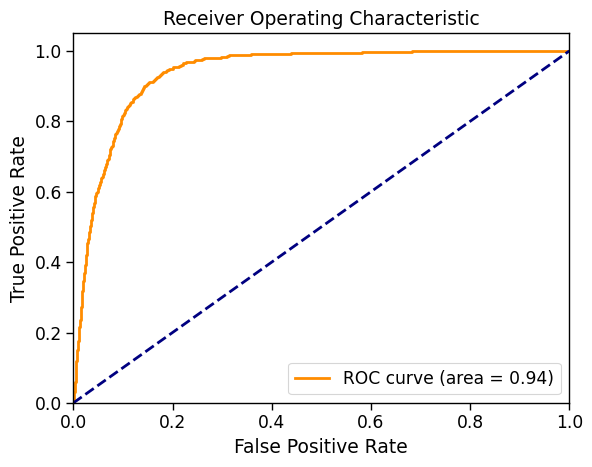

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = clf_nn2.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Feature Selection

In [72]:
seed_num = 0

X2 = bankData[['duration', 'nr.employed','poutcome_success','euribor3m','cons.conf.idx']]
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.3,random_state=seed_num) 

print(X_train2.shape)
print(X_test2.shape)

(18452, 5)
(7908, 5)


In [73]:
from sklearn.model_selection import GridSearchCV
 #'batch_size' : [128,256],

layers = [[20], [40,20] ,[45,40,15]] # we try using 1 2 3 hidden layer. kl 1 hidden layer itu yg 20 doang.
param_grid = [
  {'hidden_layer_sizes' : layers,
   'activation': ['logistic', 'tanh', 'relu'],
   'verbose' : [True],
   'random_state' : [0],
   'early_stopping' : [True],
   'validation_fraction' : [0.3],
  }
]
NN = MLPClassifier() # default weight = uniform
clf_nnFS = GridSearchCV(NN, param_grid, cv=5, scoring='accuracy', return_train_score=False) # if scoring = 'f1', it would count the f1 score
clf_nnFS.fit(X_train2, y_train2);

Iteration 1, loss = 0.68648759
Validation score: 0.888914
Iteration 2, loss = 0.50506074
Validation score: 0.887785
Iteration 3, loss = 0.40519453
Validation score: 0.887785
Iteration 4, loss = 0.34911279
Validation score: 0.887785
Iteration 5, loss = 0.31589508
Validation score: 0.887785
Iteration 6, loss = 0.29473939
Validation score: 0.887785
Iteration 7, loss = 0.28032307
Validation score: 0.888011
Iteration 8, loss = 0.26982676
Validation score: 0.888914
Iteration 9, loss = 0.26170010
Validation score: 0.890269
Iteration 10, loss = 0.25511271
Validation score: 0.892075
Iteration 11, loss = 0.24957406
Validation score: 0.893204
Iteration 12, loss = 0.24480060
Validation score: 0.896816
Iteration 13, loss = 0.24062391
Validation score: 0.899526
Iteration 14, loss = 0.23689151
Validation score: 0.899977
Iteration 15, loss = 0.23356227
Validation score: 0.900881
Iteration 16, loss = 0.23051760
Validation score: 0.902461
Iteration 17, loss = 0.22777171
Validation score: 0.903816
Iterat

Iteration 33, loss = 0.20793648
Validation score: 0.904493
Iteration 34, loss = 0.20745507
Validation score: 0.904945
Iteration 35, loss = 0.20706912
Validation score: 0.905622
Iteration 36, loss = 0.20671847
Validation score: 0.905396
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68600655
Validation score: 0.888462
Iteration 2, loss = 0.50422676
Validation score: 0.887785
Iteration 3, loss = 0.40421492
Validation score: 0.887785
Iteration 4, loss = 0.34809393
Validation score: 0.887785
Iteration 5, loss = 0.31464600
Validation score: 0.887785
Iteration 6, loss = 0.29324596
Validation score: 0.887785
Iteration 7, loss = 0.27871877
Validation score: 0.888011
Iteration 8, loss = 0.26817121
Validation score: 0.888914
Iteration 9, loss = 0.26010684
Validation score: 0.890720
Iteration 10, loss = 0.25361092
Validation score: 0.892752
Iteration 11, loss = 0.24820463
Validation score: 0.893881
Iteration 12, loss = 0.24361781

Iteration 4, loss = 0.31889275
Validation score: 0.887785
Iteration 5, loss = 0.30174952
Validation score: 0.887785
Iteration 6, loss = 0.28116924
Validation score: 0.887785
Iteration 7, loss = 0.26095778
Validation score: 0.892301
Iteration 8, loss = 0.24439683
Validation score: 0.899074
Iteration 9, loss = 0.23213903
Validation score: 0.903590
Iteration 10, loss = 0.22338189
Validation score: 0.906299
Iteration 11, loss = 0.21793749
Validation score: 0.905848
Iteration 12, loss = 0.21451108
Validation score: 0.906977
Iteration 13, loss = 0.21237646
Validation score: 0.908106
Iteration 14, loss = 0.21106618
Validation score: 0.909460
Iteration 15, loss = 0.21057762
Validation score: 0.908557
Iteration 16, loss = 0.20977755
Validation score: 0.908557
Iteration 17, loss = 0.20940020
Validation score: 0.908331
Iteration 18, loss = 0.20903916
Validation score: 0.909235
Iteration 19, loss = 0.20906995
Validation score: 0.908557
Iteration 20, loss = 0.20865763
Validation score: 0.907428
Ite

Iteration 21, loss = 0.20634205
Validation score: 0.908331
Iteration 22, loss = 0.20643382
Validation score: 0.908783
Iteration 23, loss = 0.20586393
Validation score: 0.907203
Iteration 24, loss = 0.20574669
Validation score: 0.907880
Iteration 25, loss = 0.20551459
Validation score: 0.908106
Iteration 26, loss = 0.20528466
Validation score: 0.909686
Iteration 27, loss = 0.20506598
Validation score: 0.906977
Iteration 28, loss = 0.20519894
Validation score: 0.909235
Iteration 29, loss = 0.20474421
Validation score: 0.907880
Iteration 30, loss = 0.20446888
Validation score: 0.908783
Iteration 31, loss = 0.20438653
Validation score: 0.908106
Iteration 32, loss = 0.20423547
Validation score: 0.908557
Iteration 33, loss = 0.20424852
Validation score: 0.907880
Iteration 34, loss = 0.20420858
Validation score: 0.908557
Iteration 35, loss = 0.20363680
Validation score: 0.908783
Iteration 36, loss = 0.20341414
Validation score: 0.909235
Iteration 37, loss = 0.20325244
Validation score: 0.9083

Iteration 11, loss = 0.22010405
Validation score: 0.905170
Iteration 12, loss = 0.21509129
Validation score: 0.908331
Iteration 13, loss = 0.21251368
Validation score: 0.907654
Iteration 14, loss = 0.21080244
Validation score: 0.906525
Iteration 15, loss = 0.21012880
Validation score: 0.906977
Iteration 16, loss = 0.20910101
Validation score: 0.907654
Iteration 17, loss = 0.20882743
Validation score: 0.908106
Iteration 18, loss = 0.20847349
Validation score: 0.906751
Iteration 19, loss = 0.20805492
Validation score: 0.908331
Iteration 20, loss = 0.20788399
Validation score: 0.906299
Iteration 21, loss = 0.20784835
Validation score: 0.907203
Iteration 22, loss = 0.20754402
Validation score: 0.907203
Iteration 23, loss = 0.20736094
Validation score: 0.906525
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.79380045
Validation score: 0.665839
Iteration 2, loss = 0.58637357
Validation score: 0.836080
Iteration 3, loss = 0.45

Iteration 46, loss = 0.19892353
Validation score: 0.910364
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.79361937
Validation score: 0.665839
Iteration 2, loss = 0.58535675
Validation score: 0.833371
Iteration 3, loss = 0.45055450
Validation score: 0.893655
Iteration 4, loss = 0.36307754
Validation score: 0.907428
Iteration 5, loss = 0.30701846
Validation score: 0.906525
Iteration 6, loss = 0.27136938
Validation score: 0.905170
Iteration 7, loss = 0.24941370
Validation score: 0.906977
Iteration 8, loss = 0.23569417
Validation score: 0.906751
Iteration 9, loss = 0.22717351
Validation score: 0.907880
Iteration 10, loss = 0.22174409
Validation score: 0.909235
Iteration 11, loss = 0.21790751
Validation score: 0.909009
Iteration 12, loss = 0.21535811
Validation score: 0.909460
Iteration 13, loss = 0.21343727
Validation score: 0.909686
Iteration 14, loss = 0.21188517
Validation score: 0.910815
Iteration 15, loss = 0.21060889

Iteration 1, loss = 0.47454977
Validation score: 0.903138
Iteration 2, loss = 0.23588073
Validation score: 0.909686
Iteration 3, loss = 0.21645938
Validation score: 0.910138
Iteration 4, loss = 0.21257158
Validation score: 0.908557
Iteration 5, loss = 0.21070171
Validation score: 0.908106
Iteration 6, loss = 0.20968833
Validation score: 0.907428
Iteration 7, loss = 0.20800329
Validation score: 0.909912
Iteration 8, loss = 0.20670871
Validation score: 0.909686
Iteration 9, loss = 0.20611265
Validation score: 0.911267
Iteration 10, loss = 0.20560217
Validation score: 0.910589
Iteration 11, loss = 0.20463272
Validation score: 0.908557
Iteration 12, loss = 0.20454868
Validation score: 0.908106
Iteration 13, loss = 0.20421550
Validation score: 0.911041
Iteration 14, loss = 0.20394349
Validation score: 0.907880
Iteration 15, loss = 0.20340950
Validation score: 0.910815
Iteration 16, loss = 0.20292009
Validation score: 0.910815
Iteration 17, loss = 0.20277250
Validation score: 0.909460
Iterat

Iteration 1, loss = 0.34519403
Validation score: 0.905396
Iteration 2, loss = 0.21912763
Validation score: 0.913299
Iteration 3, loss = 0.21253431
Validation score: 0.913299
Iteration 4, loss = 0.20859921
Validation score: 0.911944
Iteration 5, loss = 0.20688839
Validation score: 0.914202
Iteration 6, loss = 0.20437014
Validation score: 0.911267
Iteration 7, loss = 0.20282946
Validation score: 0.913750
Iteration 8, loss = 0.20238847
Validation score: 0.912621
Iteration 9, loss = 0.20116445
Validation score: 0.910815
Iteration 10, loss = 0.20104600
Validation score: 0.911944
Iteration 11, loss = 0.20004173
Validation score: 0.911718
Iteration 12, loss = 0.19934187
Validation score: 0.910589
Iteration 13, loss = 0.19922686
Validation score: 0.911718
Iteration 14, loss = 0.19854193
Validation score: 0.912847
Iteration 15, loss = 0.19802214
Validation score: 0.913524
Iteration 16, loss = 0.19763560
Validation score: 0.910364
Validation score did not improve more than tol=0.000100 for 10 co

Iteration 25, loss = 0.20374277
Validation score: 0.907880
Iteration 26, loss = 0.20346777
Validation score: 0.908331
Iteration 27, loss = 0.20312593
Validation score: 0.907654
Iteration 28, loss = 0.20302094
Validation score: 0.908106
Iteration 29, loss = 0.20270349
Validation score: 0.908783
Iteration 30, loss = 0.20249992
Validation score: 0.908783
Iteration 31, loss = 0.20236752
Validation score: 0.908783
Iteration 32, loss = 0.20213790
Validation score: 0.909235
Iteration 33, loss = 0.20204359
Validation score: 0.909460
Iteration 34, loss = 0.20191289
Validation score: 0.909686
Iteration 35, loss = 0.20175344
Validation score: 0.909235
Iteration 36, loss = 0.20162395
Validation score: 0.910138
Iteration 37, loss = 0.20149294
Validation score: 0.909912
Iteration 38, loss = 0.20139520
Validation score: 0.909686
Iteration 39, loss = 0.20125712
Validation score: 0.910815
Iteration 40, loss = 0.20112716
Validation score: 0.910364
Iteration 41, loss = 0.20106785
Validation score: 0.9105

Iteration 54, loss = 0.19507551
Validation score: 0.911718
Iteration 55, loss = 0.19489370
Validation score: 0.911718
Iteration 56, loss = 0.19479218
Validation score: 0.911041
Iteration 57, loss = 0.19468722
Validation score: 0.911267
Iteration 58, loss = 0.19449777
Validation score: 0.911267
Iteration 59, loss = 0.19440970
Validation score: 0.911041
Iteration 60, loss = 0.19424936
Validation score: 0.910815
Iteration 61, loss = 0.19400152
Validation score: 0.911041
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.81127589
Validation score: 0.688417
Iteration 2, loss = 0.58642805
Validation score: 0.902009
Iteration 3, loss = 0.43778767
Validation score: 0.901332
Iteration 4, loss = 0.34600398
Validation score: 0.899526
Iteration 5, loss = 0.29260606
Validation score: 0.900881
Iteration 6, loss = 0.26191910
Validation score: 0.902913
Iteration 7, loss = 0.24411394
Validation score: 0.904945
Iteration 8, loss = 0.2330508

Validation score: 0.911944
Iteration 31, loss = 0.19036676
Validation score: 0.913524
Iteration 32, loss = 0.18967441
Validation score: 0.911041
Iteration 33, loss = 0.18914202
Validation score: 0.912621
Iteration 34, loss = 0.18895879
Validation score: 0.913073
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.45990618
Validation score: 0.902913
Iteration 2, loss = 0.27578357
Validation score: 0.907654
Iteration 3, loss = 0.21435917
Validation score: 0.912170
Iteration 4, loss = 0.20411681
Validation score: 0.910589
Iteration 5, loss = 0.20163993
Validation score: 0.910815
Iteration 6, loss = 0.20056588
Validation score: 0.910815
Iteration 7, loss = 0.19948636
Validation score: 0.911944
Iteration 8, loss = 0.19850828
Validation score: 0.911041
Iteration 9, loss = 0.19804202
Validation score: 0.909912
Iteration 10, loss = 0.19682620
Validation score: 0.911944
Iteration 11, loss = 0.19639463
Validation score: 0.910138
Iter

Iteration 14, loss = 0.19437772
Validation score: 0.914879
Iteration 15, loss = 0.19393619
Validation score: 0.915105
Iteration 16, loss = 0.19324095
Validation score: 0.913750
Iteration 17, loss = 0.19248372
Validation score: 0.914653
Iteration 18, loss = 0.19203512
Validation score: 0.913524
Iteration 19, loss = 0.19222408
Validation score: 0.913524
Iteration 20, loss = 0.19104249
Validation score: 0.912847
Iteration 21, loss = 0.19138491
Validation score: 0.913524
Iteration 22, loss = 0.19031073
Validation score: 0.915105
Iteration 23, loss = 0.19054006
Validation score: 0.915331
Iteration 24, loss = 0.18953585
Validation score: 0.913750
Iteration 25, loss = 0.18926355
Validation score: 0.916460
Iteration 26, loss = 0.19011480
Validation score: 0.914653
Iteration 27, loss = 0.18948157
Validation score: 0.913750
Iteration 28, loss = 0.18862243
Validation score: 0.915782
Iteration 29, loss = 0.18915549
Validation score: 0.916234
Iteration 30, loss = 0.18868062
Validation score: 0.9151

Iteration 22, loss = 0.18662320
Validation score: 0.914740
Iteration 23, loss = 0.18708666
Validation score: 0.913656
Iteration 24, loss = 0.18638413
Validation score: 0.915282
Iteration 25, loss = 0.18636489
Validation score: 0.914559
Iteration 26, loss = 0.18551212
Validation score: 0.914198
Iteration 27, loss = 0.18490127
Validation score: 0.911488
Iteration 28, loss = 0.18442745
Validation score: 0.912392
Iteration 29, loss = 0.18512803
Validation score: 0.913656
Iteration 30, loss = 0.18391731
Validation score: 0.914017
Iteration 31, loss = 0.18406617
Validation score: 0.913295
Iteration 32, loss = 0.18394938
Validation score: 0.914017
Iteration 33, loss = 0.18318020
Validation score: 0.912392
Iteration 34, loss = 0.18328926
Validation score: 0.913837
Iteration 35, loss = 0.18354220
Validation score: 0.913114
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
y_pred = clf_nnFS.predict(X_test2)
print ("Accuracy : " )
print(accuracy_score(y_test2, y_pred))
print(confusion_matrix(y_test2, y_pred))
print(classification_report(y_test2, y_pred))

Accuracy : 
0.9128730399595346
[[6740  275]
 [ 414  479]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7015
           1       0.64      0.54      0.58       893

    accuracy                           0.91      7908
   macro avg       0.79      0.75      0.77      7908
weighted avg       0.91      0.91      0.91      7908



The AUC is 0.939
Threshold	TPR vs FPR
1.927	0.000 vs 0.000
0.927	0.001 vs 0.000
0.915	0.010 vs 0.000
0.914	0.010 vs 0.000
0.908	0.024 vs 0.000
0.908	0.024 vs 0.000
0.905	0.030 vs 0.000
0.905	0.030 vs 0.000
0.891	0.045 vs 0.000
0.891	0.045 vs 0.001
0.883	0.048 vs 0.001
0.879	0.048 vs 0.001
0.879	0.049 vs 0.001
0.878	0.049 vs 0.001
0.878	0.050 vs 0.001
0.878	0.050 vs 0.001
0.876	0.055 vs 0.001
0.876	0.055 vs 0.001
0.872	0.063 vs 0.001
0.872	0.063 vs 0.001
0.861	0.071 vs 0.001
0.860	0.071 vs 0.002
0.858	0.075 vs 0.002
0.858	0.075 vs 0.002
0.851	0.080 vs 0.002
0.846	0.080 vs 0.002
0.841	0.083 vs 0.002
0.841	0.083 vs 0.002
0.837	0.086 vs 0.002
0.837	0.086 vs 0.002
0.834	0.087 vs 0.002
0.833	0.087 vs 0.002
0.829	0.090 vs 0.002
0.828	0.090 vs 0.003
0.815	0.103 vs 0.003
0.813	0.103 vs 0.003
0.802	0.115 vs 0.003
0.797	0.115 vs 0.003
0.795	0.118 vs 0.003
0.791	0.118 vs 0.003
0.783	0.121 vs 0.003
0.782	0.121 vs 0.004
0.776	0.125 vs 0.004
0.774	0.125 vs 0.004
0.773	0.127 vs 0.004
0.772	0.127 vs 0.

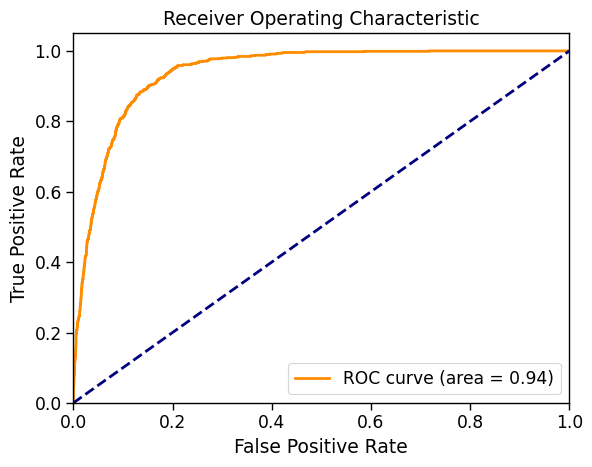

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = clf_nnFS.predict_proba(X_test2)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test2, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test2, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Submit Remember Some model need their data to be normalized

In [52]:
testData = pd.read_csv("Assignment3-Unknown-Dataset.csv")

In [53]:
testData.head()

row ID  age          job  marital    education  default housing loan  \
0   Row0   57     services  married  high.school  unknown      no   no   
1   Row1   40       admin.  married     basic.6y       no      no   no   
2   Row2   41  blue-collar  married      unknown  unknown      no   no   
3   Row3   50  blue-collar  married     basic.9y       no     yes  yes   
4   Row4   39   management   single     basic.9y  unknown      no   no   

     contact month  ... duration  campaign  pdays  previous     poutcome  \
0  telephone   may  ...      149         1    999         0  nonexistent   
1  telephone   may  ...      151         1    999         0  nonexistent   
2  telephone   may  ...       55         1    999         0  nonexistent   
3  telephone   may  ...      353         1    999         0  nonexistent   
4  telephone   may  ...      195         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0          1.1          93.994          -36.4      4.857       5191.0  
1          1.1          93.994          -36.4      4.857       5191.0  
2          1.1          93.994          -36.4      4.857       5191.0  
3          1.1          93.994          -36.4      4.857       5191.0  
4          1.1          93.994          -36.4      4.857       5191.0  

[5 rows x 21 columns]

In [54]:
testData.replace(['unknown'], pd.NA, inplace=True)

In [55]:
testData.drop(['default'],axis=1, inplace=True)
missing_categorical = ['job','marital','education','housing','loan']

In [56]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= pd.NA , strategy='most_frequent')
testData[missing_categorical] = imputer.fit_transform(testData[missing_categorical])
testData

row ID  age          job  marital            education housing loan  \
0        Row0   57     services  married          high.school      no   no   
1        Row1   40       admin.  married             basic.6y      no   no   
2        Row2   41  blue-collar  married    university.degree      no   no   
3        Row3   50  blue-collar  married             basic.9y     yes  yes   
4        Row4   39   management   single             basic.9y      no   no   
...       ...  ...          ...      ...                  ...     ...  ...   
6585  Row6585   41   technician  married  professional.course     yes   no   
6586  Row6586   60  blue-collar  married             basic.4y     yes   no   
6587  Row6587   31       admin.   single    university.degree     yes   no   
6588  Row6588   62      retired  married    university.degree     yes   no   
6589  Row6589   62      retired  married    university.degree      no   no   

        contact month day_of_week  duration  campaign  pdays  previous  \
0     telephone   may         mon       149         1    999         0   
1     telephone   may         mon       151         1    999         0   
2     telephone   may         mon        55         1    999         0   
3     telephone   may         mon       353         1    999         0   
4     telephone   may         mon       195         1    999         0   
...         ...   ...         ...       ...       ...    ...       ...   
6585   cellular   nov         mon       185         2    999         0   
6586   cellular   nov         tue       347         2      4         1   
6587   cellular   nov         thu       353         1    999         0   
6588   cellular   nov         thu       208         1      1         6   
6589   cellular   nov         thu       483         2      6         3   

         poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0     nonexistent           1.1          93.994          -36.4      4.857   
1     nonexistent           1.1          93.994          -36.4      4.857   
2     nonexistent           1.1          93.994          -36.4      4.857   
3     nonexistent           1.1          93.994          -36.4      4.857   
4     nonexistent           1.1          93.994          -36.4      4.857   
...           ...           ...             ...            ...        ...   
6585  nonexistent          -1.1          94.767          -50.8      1.039   
6586      success          -1.1          94.767          -50.8      1.035   
6587  nonexistent          -1.1          94.767          -50.8      1.031   
6588      success          -1.1          94.767          -50.8      1.031   
6589      success          -1.1          94.767          -50.8      1.031   

      nr.employed  
0          5191.0  
1          5191.0  
2          5191.0  
3          5191.0  
4          5191.0  
...           ...  
6585       4963.6  
6586       4963.6  
6587       4963.6  
6588       4963.6  
6589       4963.6  

[6590 rows x 20 columns]

In [57]:
testData = testData.drop('row ID', axis=1)
testData

age          job  marital            education housing loan    contact  \
0      57     services  married          high.school      no   no  telephone   
1      40       admin.  married             basic.6y      no   no  telephone   
2      41  blue-collar  married    university.degree      no   no  telephone   
3      50  blue-collar  married             basic.9y     yes  yes  telephone   
4      39   management   single             basic.9y      no   no  telephone   
...   ...          ...      ...                  ...     ...  ...        ...   
6585   41   technician  married  professional.course     yes   no   cellular   
6586   60  blue-collar  married             basic.4y     yes   no   cellular   
6587   31       admin.   single    university.degree     yes   no   cellular   
6588   62      retired  married    university.degree     yes   no   cellular   
6589   62      retired  married    university.degree      no   no   cellular   

     month day_of_week  duration  campaign  pdays  previous     poutcome  \
0      may         mon       149         1    999         0  nonexistent   
1      may         mon       151         1    999         0  nonexistent   
2      may         mon        55         1    999         0  nonexistent   
3      may         mon       353         1    999         0  nonexistent   
4      may         mon       195         1    999         0  nonexistent   
...    ...         ...       ...       ...    ...       ...          ...   
6585   nov         mon       185         2    999         0  nonexistent   
6586   nov         tue       347         2      4         1      success   
6587   nov         thu       353         1    999         0  nonexistent   
6588   nov         thu       208         1      1         6      success   
6589   nov         thu       483         2      6         3      success   

      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0              1.1          93.994          -36.4      4.857       5191.0  
1              1.1          93.994          -36.4      4.857       5191.0  
2              1.1          93.994          -36.4      4.857       5191.0  
3              1.1          93.994          -36.4      4.857       5191.0  
4              1.1          93.994          -36.4      4.857       5191.0  
...            ...             ...            ...        ...          ...  
6585          -1.1          94.767          -50.8      1.039       4963.6  
6586          -1.1          94.767          -50.8      1.035       4963.6  
6587          -1.1          94.767          -50.8      1.031       4963.6  
6588          -1.1          94.767          -50.8      1.031       4963.6  
6589          -1.1          94.767          -50.8      1.031       4963.6  

[6590 rows x 19 columns]

In [58]:
scale_mapper = {"illiterate":0, "basic.4y":1, "basic.6y":2 ,"basic.9y":3,
               "high.school":4,"professional.course":5,"university.degree":6}
testData["education"] = testData["education"].replace(scale_mapper)

In [59]:
X = testData

In [60]:
# Convert nominal categorical value
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,4,5,6,7,8,13])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Normal model

In [61]:
y_pred = clf_nn.predict(X)

In [62]:
emptyPred = pd.read_csv("Assignment3-Kaggle-Submission-Sample.csv")

In [63]:
emptyPred['prediction-subscribed'] = y_pred

In [64]:
emptyPred.to_csv("NN-normal.csv")

# Normalized model

In [65]:
X1 = X
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

In [66]:
y_pred = clf_nn2.predict(X1)

In [67]:
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [68]:
emptyPred = pd.read_csv("Assignment3-Kaggle-Submission-Sample.csv")

In [69]:
emptyPred.head()

row ID  prediction-subscribed
0   Row0                      0
1   Row1                      0
2   Row2                      0
3   Row3                      0
4   Row4                      0

In [70]:
emptyPred['prediction-subscribed'] = y_pred

In [71]:
emptyPred.to_csv("NN-Normalized.csv")